# Data Pipeline Assessment

## Analysing Video Game Reviews and Sales across 2 Datasets

## Introduction

This project will analyse and consider video game reviews as well as sales performance across the world, and compare the PS4's game sales against multiplatform sales. I am interested in looking at the performance of consoles against global sales, especially due to recent news regarding Microsoft, who plan to reshape their goals for Xbox as a business and a platform. As such, I will analyse data of global sales and reviews, and compare those against the PS4's best selling games, and historical data for Nintendo, to take a look at the past trends, to see if I could discern the logic and understand the market context behind what Microsoft plan to do. I have ended up using four data sets for this project, they are as follows:

Popular Video Games 1980 - 2023 🎮: https://www.kaggle.com/datasets/arnabchaki/popular-video-games-1980-2023/

Video Game Sales 1978 - 2024: https://www.kaggle.com/datasets/jasonlreed/video-game-sales

List of best-selling PlayStation 4 video games: https://www.kaggle.com/datasets/drahulsingh/list-of-best-selling-ps4-games

Global Video Game Sales: https://www.kaggle.com/datasets/thedevastator/global-video-game-sales

With these four data sets, I will extract them, perform exploratory data analysis, transform the data, visualize it, and attempt some feature engineering, before saving it to a MySQL Database. Following below is my report, detailing every step I took, and the outcomes of my work at every stage.


## Data Extraction

To begin this project, I will extract and load the data sources into their own dataframes to take an initial look at them before joining them.

In [1]:
# Fundemental modules import
import pandas as pd
import numpy as np

# Reading the CSV files to Data Frames
df_reviews = pd.read_csv("Data-Sources/games.csv")
df_sales = pd.read_csv("Data-Sources/VG_Sales_All.csv")
df_ps4 = pd.read_csv("Data-Sources/List of best-selling PlayStation 4 video games.csv")

# The dataset below is imported later on during Data Verification, but I am including it here commented out for easy access at top of file
# df_sales_extra = pd.read_csv("Data-Sources/vgsales.csv")

In [2]:
# Checking the previous reads worked
df_reviews.head()

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [3]:
df_sales.head()

,Rank,Name,Platform,All_Platforms,All_Games,Publisher,Developer,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales,Year,Genre
0,1,Tetris,Series,NaN,Tetris (1984)|Tetris (1989)|Welltris|Hatris|Tw...,The Tetris Company,Alexey Pajitnov,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988.0,Puzzle
1,2,Pokemon,Series,NaN,Pokemon Red & Green (Japan-only) & Blue|Pokemo...,Nintendo,Game Freak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998.0,Role-Playing
2,3,Call of Duty,Series,NaN,Call of Duty|Call of Duty 2|Call of Duty 3|Cal...,Activision,Infinity Ward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.0,Shooter
3,4,Grand Theft Auto,Series,NaN,Grand Theft Auto|Grand Theft Auto: London 1969...,Rockstar Games,Rockstar North,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998.0,Action-Adventure
4,5,Super Mario,Series,NaN,Mario Bros.|Super Mario Bros.|Super Mario Bros...,Nintendo,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1983.0,Platform


In [4]:
df_ps4.head()

,Game,Copies sold,Release date[a],Genre(s),Developer(s),Publisher(s)
0,Marvel's Spider-Man,20 million,"September 7, 2018",Action-adventure,Insomniac Games,Sony Interactive Entertainment
1,God of War,19.5 million,"April 20, 2018",Action-adventure hack and slash,Santa Monica Studio,Sony Interactive Entertainment
2,Uncharted 4: A Thief's End,16 million,"May 10, 2016",Action-adventure,Naughty Dog,Sony Interactive Entertainment
3,The Witcher 3: Wild Hunt,10.8 million,"May 18, 2015",Action role-playing,CD Projekt Red,CD Projekt
4,The Last of Us Part II,10 million,"June 19, 2020",Action-adventure survival horror,Naughty Dog,Sony Interactive Entertainment


Confirming that the imports were successful, I can now move on to analysing the data and seeing if I can clean it up a bit and transform any columns or rows.

## Initial Exploratory Data Analysis

In [5]:
# Checking info for the Reviews Dataset
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1511 non-null   object 
 4   Rating             1499 non-null   float64
 5   Times Listed       1512 non-null   object 
 6   Number of Reviews  1512 non-null   object 
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   object 
 11  Playing            1512 non-null   object 
 12  Backlogs           1512 non-null   object 
 13  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 165.5+ KB


In [6]:
# Checking info for the Sales Dataset
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63927 entries, 0 to 63926
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           63927 non-null  int64  
 1   Name           63927 non-null  object 
 2   Platform       63927 non-null  object 
 3   All_Platforms  1101 non-null   object 
 4   All_Games      441 non-null    object 
 5   Publisher      63927 non-null  object 
 6   Developer      63927 non-null  object 
 7   Critic_Score   6601 non-null   float64
 8   User_Score     414 non-null    float64
 9   NA_Sales       13656 non-null  float64
 10  PAL_Sales      14019 non-null  float64
 11  JP_Sales       7673 non-null   float64
 12  Other_Sales    16364 non-null  float64
 13  Global_Sales   20301 non-null  float64
 14  Year           57062 non-null  float64
 15  Genre          63927 non-null  object 
dtypes: float64(8), int64(1), object(7)
memory usage: 7.8+ MB


In [7]:
# Checking info for the PS4 dataset
df_ps4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Game             33 non-null     object
 1   Copies sold      33 non-null     object
 2   Release date[a]  33 non-null     object
 3   Genre(s)         33 non-null     object
 4   Developer(s)     33 non-null     object
 5   Publisher(s)     33 non-null     object
dtypes: object(6)
memory usage: 1.7+ KB


In [8]:
# Checking nulls for reviews dataset
df_reviews.isnull().sum().sort_values()

Unnamed: 0            0
Title                 0
Release Date          0
Times Listed          0
Number of Reviews     0
Genres                0
Reviews               0
Plays                 0
Playing               0
Backlogs              0
Wishlist              0
Team                  1
Summary               1
Rating               13
dtype: int64

There are a few null values within this dataset, I can check what they correspond to.

In [9]:
df_reviews[df_reviews.isna().any(axis=1)]

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
587,587,Final Fantasy XVI,"Jun 22, 2023","['Square Enix', 'Square Enix Creative Business...",NaN,422,422,['RPG'],Final Fantasy XVI is an upcoming action role-p...,[],37,10,732,2.4K
649,649,Death Stranding 2,releases on TBD,['Kojima Productions'],NaN,105,105,"['Adventure', 'Shooter']",NaN,[],3,0,209,644
713,713,Final Fantasy VII Rebirth,"Dec 31, 2023",['Square Enix'],NaN,192,192,[],This next standalone chapter in the FINAL FANT...,[],20,3,354,1.1K
719,719,Lies of P,"Aug 01, 2023","['NEOWIZ', 'Round8 Studio']",NaN,175,175,['RPG'],"Inspired by the familiar story of Pinocchio, L...",[],5,0,260,939
726,726,Judas,"Mar 31, 2025",['Ghost Story Games'],NaN,90,90,"['Adventure', 'Shooter']",A disintegrating starship. A desperate escape ...,[],1,0,92,437
746,746,Like a Dragon Gaiden: The Man Who Erased His Name,"Dec 31, 2023","['Ryū Ga Gotoku Studios', 'Sega']",NaN,118,118,"['Adventure', 'Brawler', 'RPG']",This game covers Kiryu's story between Yakuza ...,[],2,1,145,588
972,972,The Legend of Zelda: Tears of the Kingdom,"May 12, 2023","['Nintendo', 'Nintendo EPD Production Group No...",NaN,581,581,"['Adventure', 'RPG']",The Legend of Zelda: Tears of the Kingdom is t...,[],72,6,1.6K,5.4K
1130,1130,Star Wars Jedi: Survivor,"Apr 28, 2023","['Respawn Entertainment', 'Electronic Arts']",NaN,250,250,['Adventure'],The story of Cal Kestis continues in Star Wars...,[],13,2,367,1.4K
1160,1160,We Love Katamari Reroll + Royal Reverie,"Jun 02, 2023","['Bandai Namco Entertainment', 'MONKEYCRAFT Co...",NaN,51,51,"['Adventure', 'Puzzle']",We Love Katamari Reroll + Royal Reverie is a r...,[],3,0,74,291
1202,1202,Earthblade,"Dec 31, 2024",['Extremely OK Games'],NaN,83,83,"['Adventure', 'Indie', 'RPG']","You are Névoa, an enigmatic child of Fate retu...",[],0,1,103,529


As this dataset is dated to 2023, some of these games were not released when the dataset was put together, but have now, for example Lies of P and Final Fantasy XVI have released. As such, I will leave the Reviews section blank, but I will correct the missing Ratings. After that is done for the games where that is possible, I will drop the games which have not released yet, for example, Judas, or Death Stranding 2. Now to check the other data sets.

In [10]:
# Checking nulls for sales dataset
df_sales.isnull().sum().sort_values()

Rank                 0
Name                 0
Platform             0
Publisher            0
Developer            0
Genre                0
Year              6865
Global_Sales     43626
Other_Sales      47563
PAL_Sales        49908
NA_Sales         50271
JP_Sales         56254
Critic_Score     57326
All_Platforms    62826
All_Games        63486
User_Score       63513
dtype: int64

In [11]:
df_sales[df_sales.isna().any(axis=1)]

,Rank,Name,Platform,All_Platforms,All_Games,Publisher,Developer,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales,Year,Genre
0,1,Tetris,Series,NaN,Tetris (1984)|Tetris (1989)|Welltris|Hatris|Tw...,The Tetris Company,Alexey Pajitnov,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988.0,Puzzle
1,2,Pokemon,Series,NaN,Pokemon Red & Green (Japan-only) & Blue|Pokemo...,Nintendo,Game Freak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998.0,Role-Playing
2,3,Call of Duty,Series,NaN,Call of Duty|Call of Duty 2|Call of Duty 3|Cal...,Activision,Infinity Ward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.0,Shooter
3,4,Grand Theft Auto,Series,NaN,Grand Theft Auto|Grand Theft Auto: London 1969...,Rockstar Games,Rockstar North,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998.0,Action-Adventure
4,5,Super Mario,Series,NaN,Mario Bros.|Super Mario Bros.|Super Mario Bros...,Nintendo,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1983.0,Platform
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63922,63923,Zombieland: Double Tap - Road Trip,PC,NaN,NaN,GameMill Entertainment,High Voltage Software,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0,Shooter
63923,63924,Zombillie,NS,NaN,NaN,Forever Entertainment S.A.,Forever Entertainment S.A.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,Puzzle
63924,63925,Zone of the Enders: The 2nd Runner MARS,PC,NaN,NaN,Konami,Cygames,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,Simulation
63925,63926,Zoo Tycoon: Ultimate Animal Collection,XOne,NaN,NaN,Microsoft Studios,Frontier Developments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,Simulation


This data set is riddled with null values, and some of the columns do not make sense; grouping Series with Games under platform is inefficient, and All_Platforms is not a required column. This set will definitely need thorough cleaning and handling to make the information much more parseable. Time to check the PS4 set.

In [12]:
df_ps4[df_ps4.isna().any(axis=1)]

,Game,Copies sold,Release date[a],Genre(s),Developer(s),Publisher(s)


Thankfully, this data set is completely clean, so no nulls will need to be dropped. However, I will change the copies sold column into a float to allow for graphing the values, as it is an object right now.

## Cleaning and Transforming Data to Verify Quality

### Cleaning the Reviews Dataset

To proceed from here, the datasets will be cleaned and transformed one by one. To start with, the reviews dataset will be transformed. I will insert the values I find online into the corresponding records in the set, and then drop the records for the values that have not been released yet.

In [13]:
# Checking those null values again
df_reviews[df_reviews.isna().any(axis=1)]

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
587,587,Final Fantasy XVI,"Jun 22, 2023","['Square Enix', 'Square Enix Creative Business...",NaN,422,422,['RPG'],Final Fantasy XVI is an upcoming action role-p...,[],37,10,732,2.4K
649,649,Death Stranding 2,releases on TBD,['Kojima Productions'],NaN,105,105,"['Adventure', 'Shooter']",NaN,[],3,0,209,644
713,713,Final Fantasy VII Rebirth,"Dec 31, 2023",['Square Enix'],NaN,192,192,[],This next standalone chapter in the FINAL FANT...,[],20,3,354,1.1K
719,719,Lies of P,"Aug 01, 2023","['NEOWIZ', 'Round8 Studio']",NaN,175,175,['RPG'],"Inspired by the familiar story of Pinocchio, L...",[],5,0,260,939
726,726,Judas,"Mar 31, 2025",['Ghost Story Games'],NaN,90,90,"['Adventure', 'Shooter']",A disintegrating starship. A desperate escape ...,[],1,0,92,437
746,746,Like a Dragon Gaiden: The Man Who Erased His Name,"Dec 31, 2023","['Ryū Ga Gotoku Studios', 'Sega']",NaN,118,118,"['Adventure', 'Brawler', 'RPG']",This game covers Kiryu's story between Yakuza ...,[],2,1,145,588
972,972,The Legend of Zelda: Tears of the Kingdom,"May 12, 2023","['Nintendo', 'Nintendo EPD Production Group No...",NaN,581,581,"['Adventure', 'RPG']",The Legend of Zelda: Tears of the Kingdom is t...,[],72,6,1.6K,5.4K
1130,1130,Star Wars Jedi: Survivor,"Apr 28, 2023","['Respawn Entertainment', 'Electronic Arts']",NaN,250,250,['Adventure'],The story of Cal Kestis continues in Star Wars...,[],13,2,367,1.4K
1160,1160,We Love Katamari Reroll + Royal Reverie,"Jun 02, 2023","['Bandai Namco Entertainment', 'MONKEYCRAFT Co...",NaN,51,51,"['Adventure', 'Puzzle']",We Love Katamari Reroll + Royal Reverie is a r...,[],3,0,74,291
1202,1202,Earthblade,"Dec 31, 2024",['Extremely OK Games'],NaN,83,83,"['Adventure', 'Indie', 'RPG']","You are Névoa, an enigmatic child of Fate retu...",[],0,1,103,529


So of these games, the current unreleased games are:
Death Stranding 2, Final Fantasy VII Rebirth, Judas, Earthblade

These games will be dropped.

In [14]:
df_reviews = df_reviews.drop(df_reviews[df_reviews["Title"] == "Death Stranding 2"].index)
df_reviews = df_reviews.drop(df_reviews[df_reviews["Title"] == "Final Fantasy VII Rebirth"].index)
df_reviews = df_reviews.drop(df_reviews[df_reviews["Title"] == "Judas"].index)
df_reviews = df_reviews.drop(df_reviews[df_reviews["Title"] == "Earthblade"].index)

df_reviews[df_reviews.isna().any(axis=1)]

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
587,587,Final Fantasy XVI,"Jun 22, 2023","['Square Enix', 'Square Enix Creative Business...",NaN,422,422,['RPG'],Final Fantasy XVI is an upcoming action role-p...,[],37,10,732,2.4K
719,719,Lies of P,"Aug 01, 2023","['NEOWIZ', 'Round8 Studio']",NaN,175,175,['RPG'],"Inspired by the familiar story of Pinocchio, L...",[],5,0,260,939
746,746,Like a Dragon Gaiden: The Man Who Erased His Name,"Dec 31, 2023","['Ryū Ga Gotoku Studios', 'Sega']",NaN,118,118,"['Adventure', 'Brawler', 'RPG']",This game covers Kiryu's story between Yakuza ...,[],2,1,145,588
972,972,The Legend of Zelda: Tears of the Kingdom,"May 12, 2023","['Nintendo', 'Nintendo EPD Production Group No...",NaN,581,581,"['Adventure', 'RPG']",The Legend of Zelda: Tears of the Kingdom is t...,[],72,6,1.6K,5.4K
1130,1130,Star Wars Jedi: Survivor,"Apr 28, 2023","['Respawn Entertainment', 'Electronic Arts']",NaN,250,250,['Adventure'],The story of Cal Kestis continues in Star Wars...,[],13,2,367,1.4K
1160,1160,We Love Katamari Reroll + Royal Reverie,"Jun 02, 2023","['Bandai Namco Entertainment', 'MONKEYCRAFT Co...",NaN,51,51,"['Adventure', 'Puzzle']",We Love Katamari Reroll + Royal Reverie is a r...,[],3,0,74,291
1245,1245,NEET Girl Date Night,"Oct 21, 2022",NaN,2.7,21,21,['Visual Novel'],Your friend sets you up on a date with his NEE...,"['this sucked. ""Omg she is literally me"" is no...",106,1,44,42
1305,1305,Diablo IV,"Jun 06, 2023",['Blizzard Entertainment'],NaN,148,148,"['Brawler', 'RPG']",Endless demons to slaughter. Deep customizatio...,[],19,10,179,677
1341,1341,Pac-Man in a Tin,"Mar 22, 2023",['Fizz Creations'],NaN,0,0,['Arcade'],Pac-Man in a Tin is a pocket-sized tin contain...,[],1,0,1,2
1349,1349,Pokémon Añil,"Mar 23, 2023",['Eric Lost'],NaN,2,2,['RPG'],Pokémon Añil is the fourth video game created ...,"['pokemon HWHAT', 'Finally, after all these ye...",1,0,1,7


With the remaining games only having missing ratings despite being released, I can add in their values now.

In [15]:
df_reviews.loc[df_reviews["Title"] == "Final Fantasy XVI", "Rating"] = 4.0

df_reviews.loc[df_reviews["Title"] == "Lies of P", "Rating"] = 4.1

df_reviews.loc[df_reviews["Title"] == "Like a Dragon Gaiden: The Man Who Erased His Name", "Rating"] = 4.2

df_reviews.loc[df_reviews["Title"] == "The Legend of Zelda: Tears of the Kingdom", "Rating"] = 4.5

df_reviews.loc[df_reviews["Title"] == "Star Wars Jedi: Survivor", "Rating"] = 4.0

df_reviews.loc[df_reviews["Title"] == "We Love Katamari Reroll + Royal Reverie", "Rating"] = 4.3

df_reviews.loc[df_reviews["Title"] == "Diablo IV", "Rating"] = 3.4

# df_reviews.loc[df_reviews["Title"] == "Pac-Man in a Tin", "Rating"] = 4.0 - There is still no rating for this, so this will be dropped later

df_reviews.loc[df_reviews["Title"] == "Pokémon Añil", "Rating"] = 3.7



df_reviews[df_reviews.isna().any(axis=1)]

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
1245,1245,NEET Girl Date Night,"Oct 21, 2022",NaN,2.7,21,21,['Visual Novel'],Your friend sets you up on a date with his NEE...,"['this sucked. ""Omg she is literally me"" is no...",106,1,44,42
1341,1341,Pac-Man in a Tin,"Mar 22, 2023",['Fizz Creations'],NaN,0,0,['Arcade'],Pac-Man in a Tin is a pocket-sized tin contain...,[],1,0,1,2


Of these last two games, one I cannot find the studio for, and the other has no reviews, so I will drop both.

In [16]:
df_reviews = df_reviews.dropna()

df_reviews[df_reviews.isna().any(axis=1)]

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist


Lastly, I will rename the ID column to make it make sense instead of how it is currently.

In [17]:
df_reviews.rename(columns={"Unnamed: 0": "Game_ID"}, inplace=True)

In [18]:
df_reviews.head(10)

,Game_ID,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K
5,5,Minecraft,"Nov 18, 2011",['Mojang Studios'],4.3,2.3K,2.3K,"['Adventure', 'Simulator']",Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,33K,1.8K,1.1K,230
6,6,Omori,"Dec 25, 2020","['OMOCAT', 'PLAYISM']",4.2,1.6K,1.6K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",A turn-based surreal horror RPG in which a chi...,"[""The best game I've played in my life"", ""omor...",7.2K,1.1K,4.5K,3.8K
7,7,Metroid Dread,"Oct 07, 2021","['Nintendo', 'MercurySteam']",4.3,2.1K,2.1K,"['Adventure', 'Platform']",Join intergalactic bounty hunter Samus Aran in...,['Have only been a Metroid fan for couple of y...,9.2K,759,3.4K,3.3K
8,8,Among Us,"Jun 15, 2018",['InnerSloth'],3.0,867,867,"['Indie', 'Strategy']",Join your crew-mates in a multiplayer game of ...,"[""it's a solid party game. i'm bad at lying th...",25K,470,776,126
9,9,NieR: Automata,"Feb 23, 2017","['PlatinumGames', 'Square Enix']",4.3,2.9K,2.9K,"['Brawler', 'RPG']","NieR: Automata tells the story of androids 2B,...","['Holy shit', 'im carrying the weight of the w...",18K,1.1K,6.2K,3.6K


This dataset is now clean, which means I can work on cleaning the second dataset, which contains the sales data.

### Investigating and Cleaning the Sales Dataset

In [19]:
df_sales.head()

,Rank,Name,Platform,All_Platforms,All_Games,Publisher,Developer,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales,Year,Genre
0,1,Tetris,Series,NaN,Tetris (1984)|Tetris (1989)|Welltris|Hatris|Tw...,The Tetris Company,Alexey Pajitnov,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988.0,Puzzle
1,2,Pokemon,Series,NaN,Pokemon Red & Green (Japan-only) & Blue|Pokemo...,Nintendo,Game Freak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998.0,Role-Playing
2,3,Call of Duty,Series,NaN,Call of Duty|Call of Duty 2|Call of Duty 3|Cal...,Activision,Infinity Ward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.0,Shooter
3,4,Grand Theft Auto,Series,NaN,Grand Theft Auto|Grand Theft Auto: London 1969...,Rockstar Games,Rockstar North,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998.0,Action-Adventure
4,5,Super Mario,Series,NaN,Mario Bros.|Super Mario Bros.|Super Mario Bros...,Nintendo,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1983.0,Platform


To clean this set, I will start by handling the Platform column, as I do not need a list of both games and their series, if I have a list of all the games already. So, I will drop the games that are a series. Then, I will clean the data by removing the All_Platforms and All Games column, as those are only applicable to multiplatform games, and series. I will overwrite the Platform column with the value of All_Platforms if required, and All_Games will be empty after removing Series, so I can drop that outright. After this is done, I can check for null values and filter accordingly.

In [20]:
# Dropping rows where the Platform == Series
df_sales = df_sales.drop(df_sales[df_sales["Platform"] == "Series"].index)

df_sales.head(20)

,Rank,Name,Platform,All_Platforms,All_Games,Publisher,Developer,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales,Year,Genre
7,8,Minecraft,All,PC|PlayStation 3|Xbox 360|PlayStation 4|Xbox O...,NaN,Mojang,Mojang AB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.0,Action-Adventure
11,12,Grand Theft Auto V,All,PlayStation 3|Xbox 360|Xbox One|PlayStation 4|PC,NaN,Rockstar Games,Rockstar North,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.0,Action-Adventure
29,30,Wii Sports,Wii,NaN,NaN,Nintendo,Nintendo EAD,7.7,NaN,41.36,29.02,3.77,8.51,82.65,2006.0,Sports
41,42,PlayerUnknown's Battlegrounds,All,PC|PS4|Xbox One,NaN,PUBG Corporation,PUBG Corporation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,Shooter
50,51,The Elder Scrolls V: Skyrim,All,PC|PS3|PS4|Xbox 360|Xbox One|Switch,NaN,Bethesda Softworks,Bethesda Game Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.0,Role-Playing
52,53,Mario Kart 8 Deluxe,NS,NaN,NaN,Nintendo,Nintendo EPD,9.3,NaN,5.05,4.98,2.11,0.91,13.05,2017.0,Racing
53,54,Red Dead Redemption 2,All,PlayStation 4|Xbox One|PC,NaN,Rockstar Games,Rockstar Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,Action-Adventure
66,67,The Witcher 3: Wild Hunt,All,PC|PS4|Xbox One|Switch|PS5|Xbox Series X/S,NaN,Warner Bros. Interactive Entertainment,CD Projekt Red Studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015.0,Role-Playing
69,70,Terraria,All,PC|PlayStation 3|Xbox 360|PlayStation Vita|Pla...,NaN,Re-Logic,Re-Logic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.0,Platform
74,75,Animal Crossing: New Horizons,NS,NaN,NaN,Nintendo,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,Simulation


In [21]:
# Checking there is no more Series in the dataset

df_sales.loc[df_sales["Platform"] == "Series"]

,Rank,Name,Platform,All_Platforms,All_Games,Publisher,Developer,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales,Year,Genre


Now that the Series have been removed from the dataset, I can sort out platforms. This can be done by simply searching through the dataframe, and anywhere where the Platform == All, can be replaced by the value in All_Platforms.

In [22]:
# Replacing all the values with ALl in Platform with their value in All_Platforms
df_sales.loc[df_sales["Platform"] == "All", "Platform"] = df_sales.loc[df_sales["Platform"] == "All", "All_Platforms"]

df_sales.head(20)

,Rank,Name,Platform,All_Platforms,All_Games,Publisher,Developer,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales,Year,Genre
7,8,Minecraft,PC|PlayStation 3|Xbox 360|PlayStation 4|Xbox O...,PC|PlayStation 3|Xbox 360|PlayStation 4|Xbox O...,NaN,Mojang,Mojang AB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.0,Action-Adventure
11,12,Grand Theft Auto V,PlayStation 3|Xbox 360|Xbox One|PlayStation 4|PC,PlayStation 3|Xbox 360|Xbox One|PlayStation 4|PC,NaN,Rockstar Games,Rockstar North,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.0,Action-Adventure
29,30,Wii Sports,Wii,NaN,NaN,Nintendo,Nintendo EAD,7.7,NaN,41.36,29.02,3.77,8.51,82.65,2006.0,Sports
41,42,PlayerUnknown's Battlegrounds,PC|PS4|Xbox One,PC|PS4|Xbox One,NaN,PUBG Corporation,PUBG Corporation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,Shooter
50,51,The Elder Scrolls V: Skyrim,PC|PS3|PS4|Xbox 360|Xbox One|Switch,PC|PS3|PS4|Xbox 360|Xbox One|Switch,NaN,Bethesda Softworks,Bethesda Game Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.0,Role-Playing
52,53,Mario Kart 8 Deluxe,NS,NaN,NaN,Nintendo,Nintendo EPD,9.3,NaN,5.05,4.98,2.11,0.91,13.05,2017.0,Racing
53,54,Red Dead Redemption 2,PlayStation 4|Xbox One|PC,PlayStation 4|Xbox One|PC,NaN,Rockstar Games,Rockstar Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,Action-Adventure
66,67,The Witcher 3: Wild Hunt,PC|PS4|Xbox One|Switch|PS5|Xbox Series X/S,PC|PS4|Xbox One|Switch|PS5|Xbox Series X/S,NaN,Warner Bros. Interactive Entertainment,CD Projekt Red Studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015.0,Role-Playing
69,70,Terraria,PC|PlayStation 3|Xbox 360|PlayStation Vita|Pla...,PC|PlayStation 3|Xbox 360|PlayStation Vita|Pla...,NaN,Re-Logic,Re-Logic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.0,Platform
74,75,Animal Crossing: New Horizons,NS,NaN,NaN,Nintendo,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,Simulation


With this done, the All_Platforms and All_Games columns can be completely dropped from the dataframe now.

In [23]:
# Dropping the column All_Platforms and All_Games
df_sales = df_sales.drop(columns = ["All_Platforms", "All_Games"])

In [24]:
df_sales.head(20)

,Rank,Name,Platform,Publisher,Developer,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales,Year,Genre
7,8,Minecraft,PC|PlayStation 3|Xbox 360|PlayStation 4|Xbox O...,Mojang,Mojang AB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.0,Action-Adventure
11,12,Grand Theft Auto V,PlayStation 3|Xbox 360|Xbox One|PlayStation 4|PC,Rockstar Games,Rockstar North,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.0,Action-Adventure
29,30,Wii Sports,Wii,Nintendo,Nintendo EAD,7.7,NaN,41.36,29.02,3.77,8.51,82.65,2006.0,Sports
41,42,PlayerUnknown's Battlegrounds,PC|PS4|Xbox One,PUBG Corporation,PUBG Corporation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,Shooter
50,51,The Elder Scrolls V: Skyrim,PC|PS3|PS4|Xbox 360|Xbox One|Switch,Bethesda Softworks,Bethesda Game Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.0,Role-Playing
52,53,Mario Kart 8 Deluxe,NS,Nintendo,Nintendo EPD,9.3,NaN,5.05,4.98,2.11,0.91,13.05,2017.0,Racing
53,54,Red Dead Redemption 2,PlayStation 4|Xbox One|PC,Rockstar Games,Rockstar Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,Action-Adventure
66,67,The Witcher 3: Wild Hunt,PC|PS4|Xbox One|Switch|PS5|Xbox Series X/S,Warner Bros. Interactive Entertainment,CD Projekt Red Studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015.0,Role-Playing
69,70,Terraria,PC|PlayStation 3|Xbox 360|PlayStation Vita|Pla...,Re-Logic,Re-Logic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.0,Platform
74,75,Animal Crossing: New Horizons,NS,Nintendo,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,Simulation


With the redundant columns dropped, next up will be to drop the Null values for sales as those are irrelevant data for this dataset.

In [25]:
# Checking null values in global sales:
df_sales["Global_Sales"].isnull().sum()

43163

In [26]:
# Checking non-null values in global sales:
df_sales[df_sales.columns[11]].count()

20301

Unfortunately this means that only 1/3rd of this dataset is actually usable data, which is a heavy loss in this data set. Still, I will continue cleaning the set by removing values that are null in global sales.

In [27]:
# Dropping values that are null in the Global Sales column
df_sales.dropna(subset=["Global_Sales"], inplace = True)
df_sales

,Rank,Name,Platform,Publisher,Developer,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales,Year,Genre
29,30,Wii Sports,Wii,Nintendo,Nintendo EAD,7.7,NaN,41.36,29.02,3.77,8.51,82.65,2006.0,Sports
52,53,Mario Kart 8 Deluxe,NS,Nintendo,Nintendo EPD,9.3,NaN,5.05,4.98,2.11,0.91,13.05,2017.0,Racing
79,80,Super Mario Bros.,NES,Nintendo,Nintendo EAD,10.0,8.2,29.08,3.58,6.81,0.77,40.24,1985.0,Platform
85,86,Mario Kart Wii,Wii,Nintendo,Nintendo EAD,8.2,9.1,15.91,12.92,3.80,3.35,35.98,2008.0,Racing
92,93,Tetris,GB,Nintendo,Bullet Proof Software,NaN,NaN,23.20,2.26,4.22,0.58,30.26,1989.0,Puzzle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23353,23354,"Mind, Body & Soul: Blend It!",DS,505 Games,Crush Digital,NaN,NaN,NaN,0.00,NaN,NaN,0.00,2010.0,Puzzle
23354,23355,Ride! Carnival Tycoon,PC,ValuSoft,ValuSoft,NaN,NaN,NaN,0.00,NaN,NaN,0.00,2007.0,Strategy
23355,23356,Shinobido: Tales of the Ninja,PSP,Sony Computer Entertainment,Acquire,NaN,NaN,NaN,0.00,NaN,NaN,0.00,2007.0,Action
23356,23357,Tactical Ops: Assault on Terror,PC,Atari,Kamehan Studios,NaN,NaN,NaN,0.00,NaN,NaN,0.00,2002.0,Shooter


This results in a dataset of 20,000 rows of data, however it is still clear that there are lots of null values in the data set. Out of curiousity, removing the nulls in the regional sales columns results in:

In [28]:
# Dropping null values from the columns in the subset
df_sales_temp = df_sales.dropna(subset=["Global_Sales", "NA_Sales", "PAL_Sales", "JP_Sales", "Other_Sales"])
df_sales_temp

,Rank,Name,Platform,Publisher,Developer,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales,Year,Genre
29,30,Wii Sports,Wii,Nintendo,Nintendo EAD,7.7,NaN,41.36,29.02,3.77,8.51,82.65,2006.0,Sports
52,53,Mario Kart 8 Deluxe,NS,Nintendo,Nintendo EPD,9.3,NaN,5.05,4.98,2.11,0.91,13.05,2017.0,Racing
79,80,Super Mario Bros.,NES,Nintendo,Nintendo EAD,10.0,8.2,29.08,3.58,6.81,0.77,40.24,1985.0,Platform
85,86,Mario Kart Wii,Wii,Nintendo,Nintendo EAD,8.2,9.1,15.91,12.92,3.80,3.35,35.98,2008.0,Racing
92,93,Tetris,GB,Nintendo,Bullet Proof Software,NaN,NaN,23.20,2.26,4.22,0.58,30.26,1989.0,Puzzle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18946,18947,Shinsei Batteki Drive Girls,PSV,Aksys Games,Bergsala Lightweight,NaN,NaN,0.01,0.00,0.01,0.00,0.03,2017.0,Action
18950,18951,Criminal Girls 2: Party Favors,PSV,NIS America,Nippon Ichi Software,NaN,NaN,0.03,0.01,0.03,0.01,0.09,2016.0,Role-Playing
19140,19141,Gotcha Force,GC,Capcom,Capcom,5.8,NaN,0.01,0.00,0.01,0.00,0.03,2003.0,Shooter
19841,19842,Tenkai Knights: Brave Battle,3DS,Namco Bandai Games,Delta Factory,4.5,NaN,0.01,0.01,0.00,0.00,0.02,2014.0,Action


### Comparing Sales to Another Online Dataset

Nearly 3000 valid values remain, which is a far cry from the 60,000 from the start with this data set. Really quickly, I will check the latest years from this dataset to compare to others online.

In [29]:
# Sorting the data by years descending
df_sales_temp.sort_values(by=["Year"], ascending=False).head(20)

,Rank,Name,Platform,Publisher,Developer,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales,Year,Genre
11777,11778,Disgaea 4: A Promise Unforgotten,PSV,NIS America,Unknown,NaN,NaN,0.03,0.03,0.08,0.02,0.16,2020.0,Misc
8861,8862,Bravo Team,PS4,Sony Interactive Entertainment,Supermassive Games Ltd.,NaN,NaN,0.12,0.09,0.02,0.04,0.27,2018.0,Shooter
8297,8298,NBA 2K19,NS,2K Sports,Visual Concepts,NaN,NaN,0.24,0.02,0.01,0.03,0.30,2018.0,Sports
8665,8666,WarioWare Gold,3DS,Nintendo,Intelligent Systems,8.1,NaN,0.11,0.03,0.13,0.01,0.28,2018.0,Misc
10853,10854,Street Fighter 30th Anniversary Collection,NS,Capcom,Capcom,8.5,NaN,0.12,0.04,0.01,0.02,0.19,2018.0,Fighting
455,456,FIFA 19,PS4,Electronic Arts,EA Sports,NaN,NaN,0.84,6.87,0.10,1.34,9.15,2018.0,Sports
1861,1862,Dragon Quest XI: Echoes of an Elusive Age,PS4,Square Enix,Square Enix,9.5,NaN,0.29,0.22,1.43,0.10,2.04,2018.0,Role-Playing
3234,3235,Crash Bandicoot N. Sane Trilogy,NS,Activision,Toys for Bob,6.0,NaN,0.44,0.57,0.02,0.09,1.11,2018.0,Platform
449,450,Call of Duty: Black Ops IIII,PS4,Activision,Treyarch,NaN,NaN,4.05,3.28,0.50,1.49,9.32,2018.0,Shooter
8547,8548,Overcooked! 2,NS,Sold Out,Ghost Town Games,8.4,NaN,0.17,0.09,0.01,0.03,0.29,2018.0,Simulation


The data time cut-off appears to be 2018, with one game from 2020 meeting the criteria of having sales figures, which is an outlier as no other games from that year made it. So that's 3000 games spanning 1985 to 2018. Meanwhile, I was able to find another data set online, consisting of games from 1980 to 2017 that I would like to investigate real quick, to confirm whether that set is of higher quality than this one. So below, I will quickly import that data set, and remove duplicates, to determine whether my current data set is acceptable.

In [30]:
# Importing the new dataset that I found online to compare it against the previous cleaned one
df_sales_extra = pd.read_csv("Data-Sources/vgsales.csv")
df_sales_extra

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


This dataset has 16,598 rows, however it also has duplicate rows as each game is split into game per platform unlike the previous dataset. With duplicates removed...

In [31]:
# Dropping duplicates based off of the Name column
df_sales_extra = df_sales_extra.drop_duplicates(subset=["Name"])

df_sales_extra

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16589,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016.0,Action,dramatic create,0.00,0.00,0.01,0.00,0.01
16590,16593,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,Falcom Corporation,0.00,0.00,0.01,0.00,0.01
16592,16595,Plushees,DS,2008.0,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01


This now has 11,493 values. Checking if there are any potential duplicates below by using Skyrim as an example:

In [32]:
# Checking for game names that contain the word Skyrim
df_sales_extra["Name"].str.contains("Skyrim").sum()

1

This confirms that duplicates have been removed, as there would normally be 3 or more platforms for the game Skyrim. This means that this dataset contains 11,493 games, meanwhile the cleaned dataset I produced earlier only had 3000 games. As such, this dataset is of much higher quality than the previous set that I cleaned, so therefore I will use this new dataset for the future. I will reload the dataset to return the values back to normal, before running an aggregation on it to create a new dataframe to combine the duplicate games into one without their platform.

### Switching to and Cleaning the Sales_Extra Dataset

In [33]:
# Importing the data once more to begin my transformations
df_sales_extra = pd.read_csv("Data-Sources/vgsales.csv")

# Defining my columns to be kept in the aggregated table, and determining what data is kept or transformed, eg the sales data has the sum function appplied to it
aggregated_columns = {"Rank":"first", "Name":"first", "Year":"first", "Genre":"first", "Publisher":"first", "NA_Sales":"sum", "EU_Sales": "sum", "JP_Sales": "sum", "Other_Sales":"sum", "Global_Sales":"sum"}

# Creating a new dataframe based off of the aggregate functions defined previously
df_sales_new = df_sales_extra.groupby(df_sales_extra["Name"]).aggregate(aggregated_columns)

# Resetting the index for this new dataframe so that things do not conflict
df_sales_new.reset_index(drop=True, inplace=True)

df_sales_new

,Rank,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,4756,'98 Koshien,1998.0,Sports,Magical Company,0.15,0.10,0.12,0.03,0.41
1,8359,.hack//G.U. Vol.1//Rebirth,2006.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17
2,7109,.hack//G.U. Vol.2//Reminisce,2006.0,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03,0.23
3,8604,.hack//G.U. Vol.2//Reminisce (jp sales),2006.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00,0.16
4,8306,.hack//G.U. Vol.3//Redemption,2007.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17
...,...,...,...,...,...,...,...,...,...,...
11488,16417,thinkSMART: Chess for Kids,2011.0,Misc,Mentor Interactive,0.01,0.00,0.00,0.00,0.01
11489,628,uDraw Studio,2010.0,Misc,THQ,1.67,0.58,0.00,0.20,2.46
11490,7837,uDraw Studio: Instant Artist,2011.0,Misc,THQ,0.09,0.10,0.00,0.02,0.21
11491,471,wwe Smackdown vs. Raw 2006,NaN,Fighting,None,1.57,1.02,0.00,0.41,3.00


As seen above, the data is now aggregated correctly for each entry now, however there are some nulls that need to be tidied up, which appear to be duplicates of games named differently, such as in the example of that WWE game, as the following is also present in the data set:

In [34]:
# Searching the data for that specific string, which is similar to the one visible in the above preview
df_sales_new.loc[df_sales_new["Name"].str.contains("SmackDown! vs. RAW")]

,Rank,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
10844,487,WWE SmackDown! vs. RAW 2006,2005.0,Fighting,THQ,1.81,1.12,0.04,0.36,3.34


So, null values can be checked and removed.

In [35]:
# Checking totals for all null values
df_sales_new.isnull().sum().sort_values()

Rank              0
Name              0
Genre             0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
Publisher        51
Year            133
dtype: int64

These values can simply be outright dropped as they have little effect regarding sales

In [36]:
# Dropping the null values and checking again the count of nulls
df_sales_new = df_sales_new.dropna()

df_reviews.isnull().sum().sort_values()

Game_ID              0
Title                0
Release Date         0
Team                 0
Rating               0
Times Listed         0
Number of Reviews    0
Genres               0
Summary              0
Reviews              0
Plays                0
Playing              0
Backlogs             0
Wishlist             0
dtype: int64

This now results in the clean dataset below:

In [37]:
df_sales_new

,Rank,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,4756,'98 Koshien,1998.0,Sports,Magical Company,0.15,0.10,0.12,0.03,0.41
1,8359,.hack//G.U. Vol.1//Rebirth,2006.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17
2,7109,.hack//G.U. Vol.2//Reminisce,2006.0,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03,0.23
3,8604,.hack//G.U. Vol.2//Reminisce (jp sales),2006.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00,0.16
4,8306,.hack//G.U. Vol.3//Redemption,2007.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17
...,...,...,...,...,...,...,...,...,...,...
11487,14387,thinkSMART FAMILY!,2010.0,Misc,Conspiracy Entertainment,0.03,0.00,0.00,0.00,0.03
11488,16417,thinkSMART: Chess for Kids,2011.0,Misc,Mentor Interactive,0.01,0.00,0.00,0.00,0.01
11489,628,uDraw Studio,2010.0,Misc,THQ,1.67,0.58,0.00,0.20,2.46
11490,7837,uDraw Studio: Instant Artist,2011.0,Misc,THQ,0.09,0.10,0.00,0.02,0.21


11,325 is significantly better than the messy dataset that I cleaned before, therefore it will definitely be ideal to use this dataset going forward. Following on from the aggregation earlier, I will re-add the platforms to the dataframe, first by creating a sub-dataframe with the aggregation of just the name and platform column.

In [38]:
# Creating an extra mini-dataframe with the Platform, where the aggregate and apply functions have been used to join the strings together
df_sales_temp = df_sales_extra.groupby(df_sales_extra["Name"])["Platform"].apply(' | '.join).reset_index() 

df_sales_temp

,Name,Platform
0,'98 Koshien,PS
1,.hack//G.U. Vol.1//Rebirth,PS2
2,.hack//G.U. Vol.2//Reminisce,PS2
3,.hack//G.U. Vol.2//Reminisce (jp sales),PS2
4,.hack//G.U. Vol.3//Redemption,PS2
...,...,...
11488,thinkSMART: Chess for Kids,DS
11489,uDraw Studio,Wii
11490,uDraw Studio: Instant Artist,Wii | X360
11491,wwe Smackdown vs. Raw 2006,PS2


And now I can merge the dataframes together like so:

In [39]:
# Merging the previous dataframe with the existing aggregate dataframe so that the aggregated platforms can be included
df_sales_new = df_sales_new.merge(df_sales_temp[["Name", "Platform"]], how="left", on="Name")

In [40]:
df_sales_new

,Rank,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform
0,4756,'98 Koshien,1998.0,Sports,Magical Company,0.15,0.10,0.12,0.03,0.41,PS
1,8359,.hack//G.U. Vol.1//Rebirth,2006.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17,PS2
2,7109,.hack//G.U. Vol.2//Reminisce,2006.0,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03,0.23,PS2
3,8604,.hack//G.U. Vol.2//Reminisce (jp sales),2006.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00,0.16,PS2
4,8306,.hack//G.U. Vol.3//Redemption,2007.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17,PS2
...,...,...,...,...,...,...,...,...,...,...,...
11320,14387,thinkSMART FAMILY!,2010.0,Misc,Conspiracy Entertainment,0.03,0.00,0.00,0.00,0.03,Wii
11321,16417,thinkSMART: Chess for Kids,2011.0,Misc,Mentor Interactive,0.01,0.00,0.00,0.00,0.01,DS
11322,628,uDraw Studio,2010.0,Misc,THQ,1.67,0.58,0.00,0.20,2.46,Wii
11323,7837,uDraw Studio: Instant Artist,2011.0,Misc,THQ,0.09,0.10,0.00,0.02,0.21,Wii | X360


And I will rename the column due to it now being plural:

In [41]:
# Renaming the platform column to platforms
df_sales_new.rename(columns={"Platform": "Platforms"}, inplace=True)

In [42]:
df_sales_new.head(20)

,Rank,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platforms
0,4756,'98 Koshien,1998.0,Sports,Magical Company,0.15,0.10,0.12,0.03,0.41,PS
1,8359,.hack//G.U. Vol.1//Rebirth,2006.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17,PS2
2,7109,.hack//G.U. Vol.2//Reminisce,2006.0,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03,0.23,PS2
3,8604,.hack//G.U. Vol.2//Reminisce (jp sales),2006.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00,0.16,PS2
4,8306,.hack//G.U. Vol.3//Redemption,2007.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17,PS2
5,1565,.hack//Infection Part 1,2002.0,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.27,PS2
6,9076,.hack//Link,2010.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.14,0.00,0.14,PSP
7,3004,.hack//Mutation Part 2,2002.0,Role-Playing,Atari,0.23,0.18,0.20,0.06,0.68,PS2
8,4296,.hack//Outbreak Part 3,2002.0,Role-Playing,Atari,0.14,0.11,0.17,0.04,0.46,PS2
9,8009,.hack//Quarantine Part 4: The Final Chapter,2003.0,Role-Playing,Atari,0.09,0.07,0.00,0.02,0.18,PS2


Finally, I will multiply the columns by 1 million to make their numbers easier to understand.

In [43]:
df_sales_new["NA_Sales"] = df_sales_new["NA_Sales"] * 1000000
df_sales_new["EU_Sales"] = df_sales_new["EU_Sales"] * 1000000
df_sales_new["JP_Sales"] = df_sales_new["JP_Sales"] * 1000000
df_sales_new["Other_Sales"] = df_sales_new["Other_Sales"] * 1000000
df_sales_new["Global_Sales"] = df_sales_new["Global_Sales"] * 1000000
df_sales_new

,Rank,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platforms
0,4756,'98 Koshien,1998.0,Sports,Magical Company,150000.0,100000.0,120000.0,30000.0,410000.0,PS
1,8359,.hack//G.U. Vol.1//Rebirth,2006.0,Role-Playing,Namco Bandai Games,0.0,0.0,170000.0,0.0,170000.0,PS2
2,7109,.hack//G.U. Vol.2//Reminisce,2006.0,Role-Playing,Namco Bandai Games,110000.0,90000.0,0.0,30000.0,230000.0,PS2
3,8604,.hack//G.U. Vol.2//Reminisce (jp sales),2006.0,Role-Playing,Namco Bandai Games,0.0,0.0,160000.0,0.0,160000.0,PS2
4,8306,.hack//G.U. Vol.3//Redemption,2007.0,Role-Playing,Namco Bandai Games,0.0,0.0,170000.0,0.0,170000.0,PS2
...,...,...,...,...,...,...,...,...,...,...,...
11320,14387,thinkSMART FAMILY!,2010.0,Misc,Conspiracy Entertainment,30000.0,0.0,0.0,0.0,30000.0,Wii
11321,16417,thinkSMART: Chess for Kids,2011.0,Misc,Mentor Interactive,10000.0,0.0,0.0,0.0,10000.0,DS
11322,628,uDraw Studio,2010.0,Misc,THQ,1670000.0,580000.0,0.0,200000.0,2460000.0,Wii
11323,7837,uDraw Studio: Instant Artist,2011.0,Misc,THQ,90000.0,100000.0,0.0,20000.0,210000.0,Wii | X360


With this complete, we now finally have a cleaneed data set for sales, which can be compared against the other datasets soon. Next, I will alter the PS4 dataset to change sales into a float.

### Transforming Columns in the PS4 Dataset

In [44]:
df_ps4

,Game,Copies sold,Release date[a],Genre(s),Developer(s),Publisher(s)
0,Marvel's Spider-Man,20 million,"September 7, 2018",Action-adventure,Insomniac Games,Sony Interactive Entertainment
1,God of War,19.5 million,"April 20, 2018",Action-adventure hack and slash,Santa Monica Studio,Sony Interactive Entertainment
2,Uncharted 4: A Thief's End,16 million,"May 10, 2016",Action-adventure,Naughty Dog,Sony Interactive Entertainment
3,The Witcher 3: Wild Hunt,10.8 million,"May 18, 2015",Action role-playing,CD Projekt Red,CD Projekt
4,The Last of Us Part II,10 million,"June 19, 2020",Action-adventure survival horror,Naughty Dog,Sony Interactive Entertainment
5,Horizon Zero Dawn,10 million,"February 28, 2017",Action role-playing,Guerrilla Games,Sony Interactive Entertainment
6,The Last of Us Remastered,10 million,"July 29, 2014",Action-adventure survival horror,Naughty Dog,Sony Computer Entertainment
7,Ghost of Tsushima,9.73 million,"July 17, 2020",Action-adventure stealth,Sucker Punch Productions,Sony Interactive Entertainment
8,Star Wars Battlefront,8.42 million,"November 17, 2015",First-person shooter third-person shooter,EA DICE,Electronic Arts
9,Gran Turismo Sport,8 million,"October 17, 2017",Racing,Polyphony Digital,Sony Interactive Entertainment


In [45]:
# Removing the million from the strings
df_ps4["Copies sold"] = df_ps4["Copies sold"] .str.replace(" million", "", regex=True)
df_ps4

,Game,Copies sold,Release date[a],Genre(s),Developer(s),Publisher(s)
0,Marvel's Spider-Man,20,"September 7, 2018",Action-adventure,Insomniac Games,Sony Interactive Entertainment
1,God of War,19.5,"April 20, 2018",Action-adventure hack and slash,Santa Monica Studio,Sony Interactive Entertainment
2,Uncharted 4: A Thief's End,16,"May 10, 2016",Action-adventure,Naughty Dog,Sony Interactive Entertainment
3,The Witcher 3: Wild Hunt,10.8,"May 18, 2015",Action role-playing,CD Projekt Red,CD Projekt
4,The Last of Us Part II,10,"June 19, 2020",Action-adventure survival horror,Naughty Dog,Sony Interactive Entertainment
5,Horizon Zero Dawn,10,"February 28, 2017",Action role-playing,Guerrilla Games,Sony Interactive Entertainment
6,The Last of Us Remastered,10,"July 29, 2014",Action-adventure survival horror,Naughty Dog,Sony Computer Entertainment
7,Ghost of Tsushima,9.73,"July 17, 2020",Action-adventure stealth,Sucker Punch Productions,Sony Interactive Entertainment
8,Star Wars Battlefront,8.42,"November 17, 2015",First-person shooter third-person shooter,EA DICE,Electronic Arts
9,Gran Turismo Sport,8,"October 17, 2017",Racing,Polyphony Digital,Sony Interactive Entertainment


In [46]:
# Converting the column to float values
df_ps4["Copies sold"] = df_ps4["Copies sold"].astype(float)
df_ps4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Game             33 non-null     object 
 1   Copies sold      33 non-null     float64
 2   Release date[a]  33 non-null     object 
 3   Genre(s)         33 non-null     object 
 4   Developer(s)     33 non-null     object 
 5   Publisher(s)     33 non-null     object 
dtypes: float64(1), object(5)
memory usage: 1.7+ KB


Now, I can multiply the column by 1 million to get the values closer to their real world values to be graphed later

In [47]:
# Multiplying the column by 1 million
df_ps4["Copies sold"] = df_ps4["Copies sold"] * 1000000
df_ps4

,Game,Copies sold,Release date[a],Genre(s),Developer(s),Publisher(s)
0,Marvel's Spider-Man,20000000.0,"September 7, 2018",Action-adventure,Insomniac Games,Sony Interactive Entertainment
1,God of War,19500000.0,"April 20, 2018",Action-adventure hack and slash,Santa Monica Studio,Sony Interactive Entertainment
2,Uncharted 4: A Thief's End,16000000.0,"May 10, 2016",Action-adventure,Naughty Dog,Sony Interactive Entertainment
3,The Witcher 3: Wild Hunt,10800000.0,"May 18, 2015",Action role-playing,CD Projekt Red,CD Projekt
4,The Last of Us Part II,10000000.0,"June 19, 2020",Action-adventure survival horror,Naughty Dog,Sony Interactive Entertainment
5,Horizon Zero Dawn,10000000.0,"February 28, 2017",Action role-playing,Guerrilla Games,Sony Interactive Entertainment
6,The Last of Us Remastered,10000000.0,"July 29, 2014",Action-adventure survival horror,Naughty Dog,Sony Computer Entertainment
7,Ghost of Tsushima,9730000.0,"July 17, 2020",Action-adventure stealth,Sucker Punch Productions,Sony Interactive Entertainment
8,Star Wars Battlefront,8420000.0,"November 17, 2015",First-person shooter third-person shooter,EA DICE,Electronic Arts
9,Gran Turismo Sport,8000000.0,"October 17, 2017",Racing,Polyphony Digital,Sony Interactive Entertainment


### Final Data Quality Checks

With this done, my 3 main datasets have nearly been fully cleaned, and analysis can begin on them soon to draw conclusions from the data. I will print out the current datasets below to give one final check for data quality:

In [48]:
df_sales_new

,Rank,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platforms
0,4756,'98 Koshien,1998.0,Sports,Magical Company,150000.0,100000.0,120000.0,30000.0,410000.0,PS
1,8359,.hack//G.U. Vol.1//Rebirth,2006.0,Role-Playing,Namco Bandai Games,0.0,0.0,170000.0,0.0,170000.0,PS2
2,7109,.hack//G.U. Vol.2//Reminisce,2006.0,Role-Playing,Namco Bandai Games,110000.0,90000.0,0.0,30000.0,230000.0,PS2
3,8604,.hack//G.U. Vol.2//Reminisce (jp sales),2006.0,Role-Playing,Namco Bandai Games,0.0,0.0,160000.0,0.0,160000.0,PS2
4,8306,.hack//G.U. Vol.3//Redemption,2007.0,Role-Playing,Namco Bandai Games,0.0,0.0,170000.0,0.0,170000.0,PS2
...,...,...,...,...,...,...,...,...,...,...,...
11320,14387,thinkSMART FAMILY!,2010.0,Misc,Conspiracy Entertainment,30000.0,0.0,0.0,0.0,30000.0,Wii
11321,16417,thinkSMART: Chess for Kids,2011.0,Misc,Mentor Interactive,10000.0,0.0,0.0,0.0,10000.0,DS
11322,628,uDraw Studio,2010.0,Misc,THQ,1670000.0,580000.0,0.0,200000.0,2460000.0,Wii
11323,7837,uDraw Studio: Instant Artist,2011.0,Misc,THQ,90000.0,100000.0,0.0,20000.0,210000.0,Wii | X360


In [49]:
df_reviews

,Game_ID,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,1507,Back to the Future: The Game,"Dec 22, 2010",['Telltale Games'],3.2,94,94,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763,5,223,67
1508,1508,Team Sonic Racing,"May 21, 2019","['Sumo Digital', 'Sega']",2.9,264,264,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1.5K,49,413,107
1509,1509,Dragon's Dogma,"May 22, 2012",['Capcom'],3.7,210,210,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1.1K,45,487,206
1510,1510,Baldur's Gate 3,"Oct 06, 2020",['Larian Studios'],4.1,165,165,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269,79,388,602


In [50]:
df_ps4

,Game,Copies sold,Release date[a],Genre(s),Developer(s),Publisher(s)
0,Marvel's Spider-Man,20000000.0,"September 7, 2018",Action-adventure,Insomniac Games,Sony Interactive Entertainment
1,God of War,19500000.0,"April 20, 2018",Action-adventure hack and slash,Santa Monica Studio,Sony Interactive Entertainment
2,Uncharted 4: A Thief's End,16000000.0,"May 10, 2016",Action-adventure,Naughty Dog,Sony Interactive Entertainment
3,The Witcher 3: Wild Hunt,10800000.0,"May 18, 2015",Action role-playing,CD Projekt Red,CD Projekt
4,The Last of Us Part II,10000000.0,"June 19, 2020",Action-adventure survival horror,Naughty Dog,Sony Interactive Entertainment
5,Horizon Zero Dawn,10000000.0,"February 28, 2017",Action role-playing,Guerrilla Games,Sony Interactive Entertainment
6,The Last of Us Remastered,10000000.0,"July 29, 2014",Action-adventure survival horror,Naughty Dog,Sony Computer Entertainment
7,Ghost of Tsushima,9730000.0,"July 17, 2020",Action-adventure stealth,Sucker Punch Productions,Sony Interactive Entertainment
8,Star Wars Battlefront,8420000.0,"November 17, 2015",First-person shooter third-person shooter,EA DICE,Electronic Arts
9,Gran Turismo Sport,8000000.0,"October 17, 2017",Racing,Polyphony Digital,Sony Interactive Entertainment


I will quickly correct the name of the Release Date column in the above dataframe:

In [51]:
df_ps4.rename(columns={"Release date[a]": "Release_Date"}, inplace=True)
df_ps4

,Game,Copies sold,Release_Date,Genre(s),Developer(s),Publisher(s)
0,Marvel's Spider-Man,20000000.0,"September 7, 2018",Action-adventure,Insomniac Games,Sony Interactive Entertainment
1,God of War,19500000.0,"April 20, 2018",Action-adventure hack and slash,Santa Monica Studio,Sony Interactive Entertainment
2,Uncharted 4: A Thief's End,16000000.0,"May 10, 2016",Action-adventure,Naughty Dog,Sony Interactive Entertainment
3,The Witcher 3: Wild Hunt,10800000.0,"May 18, 2015",Action role-playing,CD Projekt Red,CD Projekt
4,The Last of Us Part II,10000000.0,"June 19, 2020",Action-adventure survival horror,Naughty Dog,Sony Interactive Entertainment
5,Horizon Zero Dawn,10000000.0,"February 28, 2017",Action role-playing,Guerrilla Games,Sony Interactive Entertainment
6,The Last of Us Remastered,10000000.0,"July 29, 2014",Action-adventure survival horror,Naughty Dog,Sony Computer Entertainment
7,Ghost of Tsushima,9730000.0,"July 17, 2020",Action-adventure stealth,Sucker Punch Productions,Sony Interactive Entertainment
8,Star Wars Battlefront,8420000.0,"November 17, 2015",First-person shooter third-person shooter,EA DICE,Electronic Arts
9,Gran Turismo Sport,8000000.0,"October 17, 2017",Racing,Polyphony Digital,Sony Interactive Entertainment


One other final thing to consider doing for consistency is to correct dates in the dataset, as all 3 use different date formats. So, by extracting the year from the columns, I can end up with a column full of only dates.

In [52]:
# Converting the column values to datetime format
df_ps4["Release_Date"] = pd.to_datetime(df_ps4["Release_Date"])

df_ps4

,Game,Copies sold,Release_Date,Genre(s),Developer(s),Publisher(s)
0,Marvel's Spider-Man,20000000.0,2018-09-07,Action-adventure,Insomniac Games,Sony Interactive Entertainment
1,God of War,19500000.0,2018-04-20,Action-adventure hack and slash,Santa Monica Studio,Sony Interactive Entertainment
2,Uncharted 4: A Thief's End,16000000.0,2016-05-10,Action-adventure,Naughty Dog,Sony Interactive Entertainment
3,The Witcher 3: Wild Hunt,10800000.0,2015-05-18,Action role-playing,CD Projekt Red,CD Projekt
4,The Last of Us Part II,10000000.0,2020-06-19,Action-adventure survival horror,Naughty Dog,Sony Interactive Entertainment
5,Horizon Zero Dawn,10000000.0,2017-02-28,Action role-playing,Guerrilla Games,Sony Interactive Entertainment
6,The Last of Us Remastered,10000000.0,2014-07-29,Action-adventure survival horror,Naughty Dog,Sony Computer Entertainment
7,Ghost of Tsushima,9730000.0,2020-07-17,Action-adventure stealth,Sucker Punch Productions,Sony Interactive Entertainment
8,Star Wars Battlefront,8420000.0,2015-11-17,First-person shooter third-person shooter,EA DICE,Electronic Arts
9,Gran Turismo Sport,8000000.0,2017-10-17,Racing,Polyphony Digital,Sony Interactive Entertainment


In [53]:
# Attempting to convert the column to datetime format
# df_reviews["Release Date"] = pd.to_datetime(df_reviews["Release Date"])

#df_reviews

# Commenting out this line as it throws an error, 
# commented out so compiling the whole document is not interrupted, feel free to uncomment this and run it yourself
# to check the error message

The above code throws out a time data error, this is because there are apparently "Release TBD" values in the date column for this dataframe, which of course, can't be converted to a date. As such, I will find out how many there are and drop those values.

In [54]:
# Search the dataframe to find how many TBD values there are
df_reviews["Release Date"].str.contains("TBD").sum()

2

In [55]:
# Overwriting the dataframe by using the ~, which means "bitwise not" (essentially an inversion of the statement)
# So in this case overwriting the dataset with values that do NOT contain TBD
df_reviews = df_reviews[~df_reviews["Release Date"].str.contains("TBD")]

df_reviews


,Game_ID,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,1507,Back to the Future: The Game,"Dec 22, 2010",['Telltale Games'],3.2,94,94,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763,5,223,67
1508,1508,Team Sonic Racing,"May 21, 2019","['Sumo Digital', 'Sega']",2.9,264,264,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1.5K,49,413,107
1509,1509,Dragon's Dogma,"May 22, 2012",['Capcom'],3.7,210,210,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1.1K,45,487,206
1510,1510,Baldur's Gate 3,"Oct 06, 2020",['Larian Studios'],4.1,165,165,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269,79,388,602


In [56]:
# Verifying that these values have been removed
df_reviews["Release Date"].str.contains("TBD").sum()

0

In [57]:
# Now successfully converting the data to datetime format
df_reviews["Release Date"] = pd.to_datetime(df_reviews["Release Date"])

df_reviews

C:\Users\rayas\AppData\Local\Temp\ipykernel_66404\3403848654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews["Release Date"] = pd.to_datetime(df_reviews["Release Date"])


,Game_ID,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,2019-12-10,['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,2015-09-15,"['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,2017-02-24,['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,1507,Back to the Future: The Game,2010-12-22,['Telltale Games'],3.2,94,94,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763,5,223,67
1508,1508,Team Sonic Racing,2019-05-21,"['Sumo Digital', 'Sega']",2.9,264,264,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1.5K,49,413,107
1509,1509,Dragon's Dogma,2012-05-22,['Capcom'],3.7,210,210,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1.1K,45,487,206
1510,1510,Baldur's Gate 3,2020-10-06,['Larian Studios'],4.1,165,165,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269,79,388,602


With this done, the last step to perform will be to convert the dates in the reviews and ps4 dataframes to be years only, so that the data is consistent with the data in the sales table.

In [58]:
# Overwriting the dataframe column of release date with the same values, but filtered to only include year
df_reviews["Release Date"] = df_reviews["Release Date"].dt.year

df_reviews

C:\Users\rayas\AppData\Local\Temp\ipykernel_66404\2382018005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews["Release Date"] = df_reviews["Release Date"].dt.year


,Game_ID,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,2022,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,2019,['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,2017,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,2015,"['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,2017,['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,1507,Back to the Future: The Game,2010,['Telltale Games'],3.2,94,94,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763,5,223,67
1508,1508,Team Sonic Racing,2019,"['Sumo Digital', 'Sega']",2.9,264,264,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1.5K,49,413,107
1509,1509,Dragon's Dogma,2012,['Capcom'],3.7,210,210,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1.1K,45,487,206
1510,1510,Baldur's Gate 3,2020,['Larian Studios'],4.1,165,165,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269,79,388,602


In [59]:
# Performing the same calculation as above with the PS4 dataset
df_ps4["Release_Date"] = df_ps4["Release_Date"].dt.year

df_ps4

,Game,Copies sold,Release_Date,Genre(s),Developer(s),Publisher(s)
0,Marvel's Spider-Man,20000000.0,2018,Action-adventure,Insomniac Games,Sony Interactive Entertainment
1,God of War,19500000.0,2018,Action-adventure hack and slash,Santa Monica Studio,Sony Interactive Entertainment
2,Uncharted 4: A Thief's End,16000000.0,2016,Action-adventure,Naughty Dog,Sony Interactive Entertainment
3,The Witcher 3: Wild Hunt,10800000.0,2015,Action role-playing,CD Projekt Red,CD Projekt
4,The Last of Us Part II,10000000.0,2020,Action-adventure survival horror,Naughty Dog,Sony Interactive Entertainment
5,Horizon Zero Dawn,10000000.0,2017,Action role-playing,Guerrilla Games,Sony Interactive Entertainment
6,The Last of Us Remastered,10000000.0,2014,Action-adventure survival horror,Naughty Dog,Sony Computer Entertainment
7,Ghost of Tsushima,9730000.0,2020,Action-adventure stealth,Sucker Punch Productions,Sony Interactive Entertainment
8,Star Wars Battlefront,8420000.0,2015,First-person shooter third-person shooter,EA DICE,Electronic Arts
9,Gran Turismo Sport,8000000.0,2017,Racing,Polyphony Digital,Sony Interactive Entertainment


Finally, with all of this completed, I can move on to the analysis stage.

## Analysis, Visualisation, and Theories

In [60]:
# Setting up matplotlib and Seaborn imports for data visualisation later in this section
import matplotlib.pyplot as plt
import seaborn as sns

### Top 30 Games from Sales

To start with, I will investigate the top 30 games from the sales dataset that have sold the highest in the PS4's lifetime, so from 2013 to current day.

In [61]:
# Querying the sales dataset by games that released after 2013, sorted by sales descending, and finding the top 30
df_sales_new[df_sales_new["Year"] > 2013].sort_values("Global_Sales", ascending=False).head(30).reset_index()

,index,Rank,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platforms
0,1205,34,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,11890000.0,9560000.0,430000.0,3420000.0,25320000.0,PS4 | XOne | PS3 | X360 | PC
1,1203,94,Call of Duty: Advanced Warfare,2014.0,Shooter,Activision,10440000.0,8180000.0,340000.0,2930000.0,21900000.0,PS4 | XOne | PS3 | X360 | PC
2,2874,125,FIFA 15,2014.0,Sports,Electronic Arts,3200000.0,12400000.0,130000.0,3290000.0,19020000.0,PS4 | PS3 | X360 | XOne | PSV | Wii | 3DS | PC
3,2875,78,FIFA 16,2015.0,Sports,Electronic Arts,2980000.0,11290000.0,110000.0,2050000.0,16440000.0,PS4 | XOne | PS3 | X360 | PC
4,2037,155,Destiny,2014.0,Shooter,Activision,6590000.0,4120000.0,280000.0,1620000.0,12610000.0,PS4 | XOne | X360 | PS3
5,9290,98,Super Smash Bros. for Wii U and 3DS,2014.0,Fighting,Nintendo,5830000.0,2410000.0,3220000.0,1000000.0,12470000.0,3DS | WiiU
6,2931,110,Fallout 4,2015.0,Role-Playing,Bethesda Softworks,5420000.0,5040000.0,250000.0,1570000.0,12280000.0,PS4 | XOne | PC
7,8948,93,Star Wars Battlefront (2015),2015.0,Shooter,Electronic Arts,5000000.0,4880000.0,240000.0,1580000.0,11700000.0,PS4 | XOne | PC
8,7240,50,Pokemon Omega Ruby/Pokemon Alpha Sapphire,2014.0,Role-Playing,Nintendo,4230000.0,3370000.0,3080000.0,650000.0,11330000.0,3DS
9,10782,281,Watch Dogs,2014.0,Action,Ubisoft,3800000.0,4040000.0,220000.0,1440000.0,9490000.0,PS4 | PS3 | XOne | X360 | PC | WiiU


None of these games are exclusive to PS4; these games are all multiplatform and sold very well. Of these 30 games, I can check how many did not release on PS4.

In [62]:
# Creating a subset out of the previous query for more easily understandable queries following after
df_subset = df_sales_new[df_sales_new["Year"] > 2013].sort_values("Global_Sales", ascending=False).head(30).reset_index()

# Filtering the subset for where NOT platforms contains PS4 as a value
df_subset[~df_subset["Platforms"].str.contains("PS4")]

,index,Rank,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platforms
5,9290,98,Super Smash Bros. for Wii U and 3DS,2014.0,Fighting,Nintendo,5830000.0,2410000.0,3220000.0,1000000.0,12470000.0,3DS | WiiU
8,7240,50,Pokemon Omega Ruby/Pokemon Alpha Sapphire,2014.0,Role-Playing,Nintendo,4230000.0,3370000.0,3080000.0,650000.0,11330000.0,3DS
16,5491,109,Mario Kart 8,2014.0,Racing,Nintendo,3130000.0,2070000.0,1270000.0,490000.0,6960000.0,WiiU
25,10094,495,Titanfall,2014.0,Shooter,Electronic Arts,2920000.0,1480000.0,60000.0,400000.0,4860000.0,XOne | X360 | PC


As we can see, four of the 30 games in the top sales since the PS4 were not released on the PS4. 3 of these games were released exclusively for Nintendo consoles, with two of them in the top half, showcasing Nintendo's dominance in the gaming market. The global sales values of the top 5 games can be plotted on a bar chart to compare their values:

<Axes: title={'center': 'Top 5 Sales of Games Released in PS4 Lifecycle'}, xlabel='Name', ylabel='Global_Sales'>

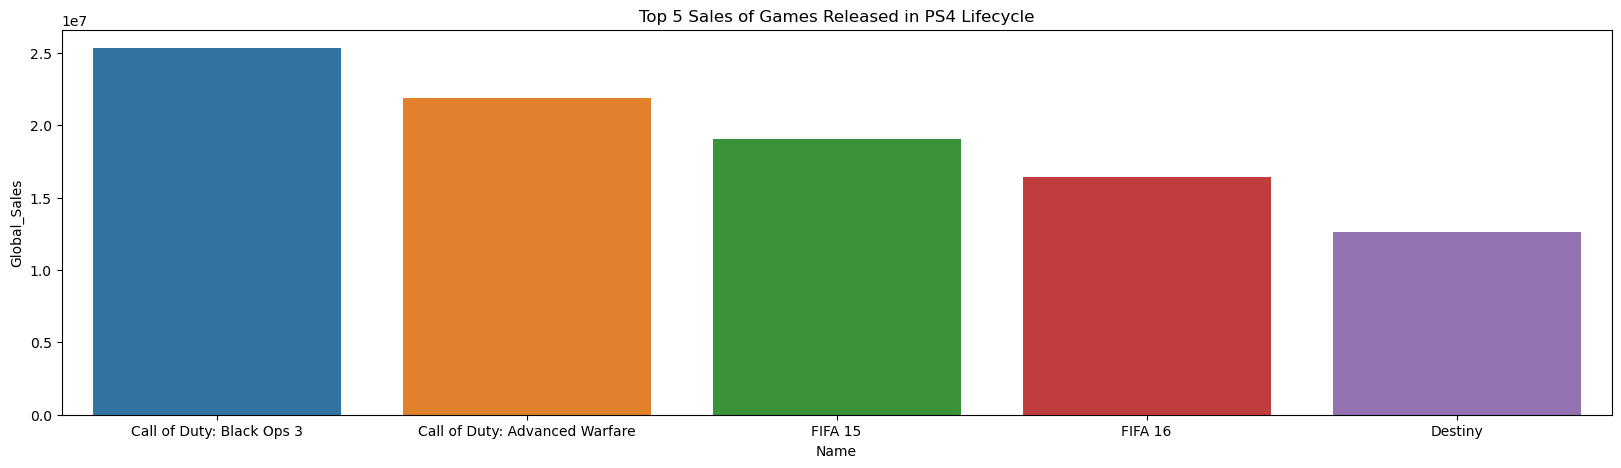

In [63]:
# Bar Chart to show top 5 games released in the PS4 Lifecycle
plt.figure(figsize=(20,5))
plt.title("Top 5 Sales of Games Released in PS4 Lifecycle")
sns.barplot(x = "Name",
            y = "Global_Sales",
            data = df_subset.head(5)
           )

These five games are completely multiplatform, so it is clear that being multiplatform gives an advantage in playerbase reach. Now, I can compare these to the dataset for best selling PS4 games to compare them across the board.

### Top 10 Games from PS4 Dataset

In [64]:
# Finding the top 10 selling games from the PS4 dataset
df_ps4.sort_values("Copies sold", ascending=False).head(10)

,Game,Copies sold,Release_Date,Genre(s),Developer(s),Publisher(s)
0,Marvel's Spider-Man,20000000.0,2018,Action-adventure,Insomniac Games,Sony Interactive Entertainment
1,God of War,19500000.0,2018,Action-adventure hack and slash,Santa Monica Studio,Sony Interactive Entertainment
2,Uncharted 4: A Thief's End,16000000.0,2016,Action-adventure,Naughty Dog,Sony Interactive Entertainment
3,The Witcher 3: Wild Hunt,10800000.0,2015,Action role-playing,CD Projekt Red,CD Projekt
4,The Last of Us Part II,10000000.0,2020,Action-adventure survival horror,Naughty Dog,Sony Interactive Entertainment
5,Horizon Zero Dawn,10000000.0,2017,Action role-playing,Guerrilla Games,Sony Interactive Entertainment
6,The Last of Us Remastered,10000000.0,2014,Action-adventure survival horror,Naughty Dog,Sony Computer Entertainment
7,Ghost of Tsushima,9730000.0,2020,Action-adventure stealth,Sucker Punch Productions,Sony Interactive Entertainment
8,Star Wars Battlefront,8420000.0,2015,First-person shooter third-person shooter,EA DICE,Electronic Arts
9,Gran Turismo Sport,8000000.0,2017,Racing,Polyphony Digital,Sony Interactive Entertainment


<Axes: title={'center': 'Top 5 Sales of PS4 Exclusives'}, xlabel='Game', ylabel='Copies sold'>

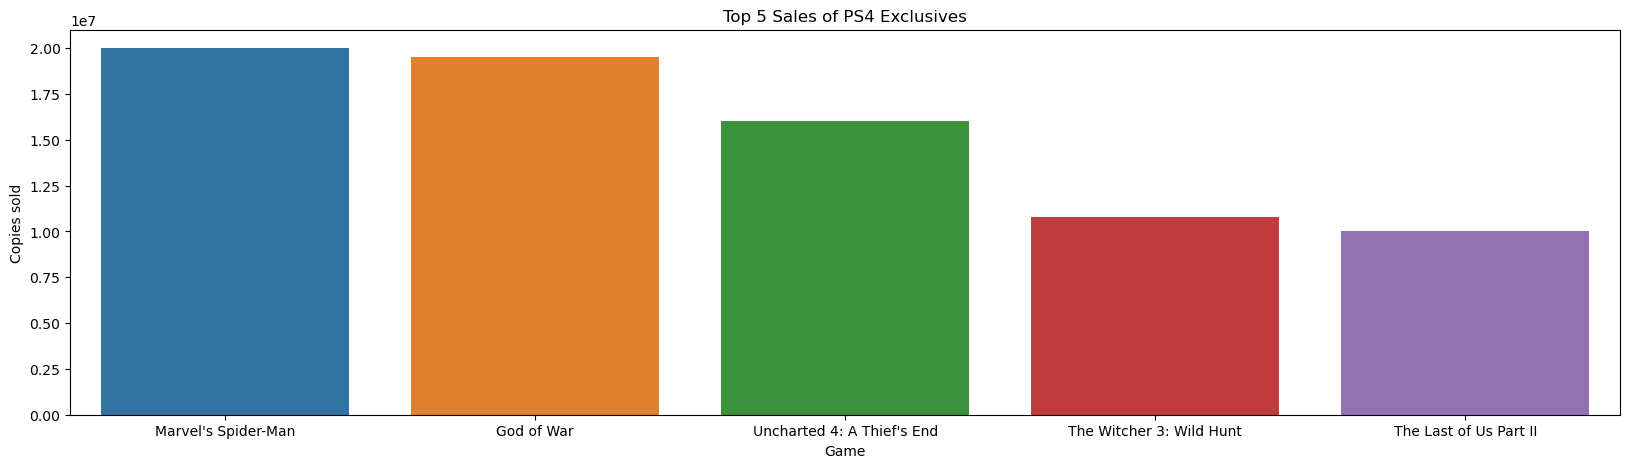

In [65]:
# Drawing graph for top 5 games in this dataframe
plt.figure(figsize=(20,5))
plt.title("Top 5 Sales of PS4 Exclusives")
sns.barplot(x = "Game",
            y = "Copies sold",
            data = df_ps4.sort_values("Copies sold", ascending=False).head(5)
           )

Some interesting insights can be gleamed by looking at this dataset now that it has been put into perspective by the previous dataset. Firstly, the exclusive games released after 2017 are on par with the multiplatform releases in the other dataset. Secondly, of the 5 highest selling games on the PS4, 4 of the 5 of those are console exclusive, and all sold over 10 million copies. The only game that was multiplatform was The Witcher 3, which by the end of the PS4's lifetime had also sold over 10 million copies on PS4 alone, surprising given that the previous data set, which cut off at 2017, listing the game at only 5 million copies. This shows that the potential for growth on a console like the PS4 is massive. 

I also want to point out that only 3 of the 10 best selling PS4 games also released before their mid-generation refresh with the PS4 Pro, showing that long-term investment into a console platform's lifecycle is much more profitable for the comapny, rather than expecting a large sales base from the start. 

Next, I want to look at regional sales from the sales database, and check how PS4 games performed in each region before 2017.

### Regional Sales for Top 30 PS4 Games

In [66]:
# Creating the subset again, this time with all values rather than top 30
df_subset = df_sales_new[df_sales_new["Year"] > 2013].sort_values("Global_Sales", ascending=False).reset_index()

# Overwriting the subset with the values from itself that are only PS4, and finding the top 30 of those
df_subset = df_subset[df_subset["Platforms"] == "PS4"].head(30)

df_subset.head(5)

,index,Rank,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platforms
31,10488,244,Uncharted: The Nathan Drake Collection,2015.0,Action,Sony Computer Entertainment,1960000.0,1690000.0,80000.0,740000.0,4470000.0,PS4
35,10485,272,Uncharted 4: A Thief's End,2016.0,Shooter,Sony Computer Entertainment,1300000.0,2070000.0,180000.0,650000.0,4200000.0,PS4
62,11315,539,inFAMOUS: Second Son,2014.0,Action,Sony Computer Entertainment,1270000.0,970000.0,70000.0,470000.0,2780000.0,PS4
72,904,662,Bloodborne,2015.0,Action,Sony Computer Entertainment,1000000.0,760000.0,260000.0,360000.0,2380000.0,PS4
87,2519,850,DriveClub,2014.0,Racing,Sony Computer Entertainment,350000.0,1310000.0,20000.0,330000.0,2000000.0,PS4


From this subset, I can find the averages for each region

In [67]:
average_na = df_subset["NA_Sales"].mean()
average_na

289666.6666666667

In [68]:
average_eu = df_subset["EU_Sales"].mean()
average_eu

359666.6666666667

In [69]:
average_jp = df_subset["JP_Sales"].mean()
average_jp

47000.0

In [70]:
average_other = df_subset["Other_Sales"].mean()
average_other

129666.66666666667

Creating a pie chart from these values:

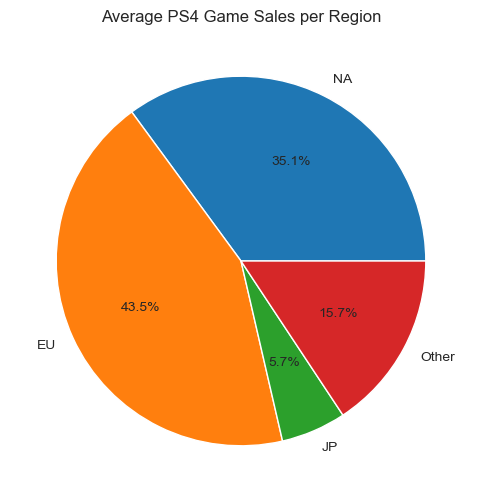

In [71]:
# Creating a temporary dataframe to hold the average values, and the labels
temp_df = {
    "labels": ["NA", "EU", "JP", "Other"],
    "values": [average_na, average_eu, average_jp, average_other]
    }

# Setting style and size for plot
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))

# Drawing pie chart by using the data from temp df, setting percent to 1dp
plt.pie(temp_df["values"], labels=temp_df["labels"], autopct="%1.1f%%")
plt.title("Average PS4 Game Sales per Region")
plt.show()

From these values, we can see that EU is the region that on average sells the most copies, with NA just behind, and Other and JP farther behind that. This shows that the strongest market to get share in and compete in would be EU, which Sony does have a branch in to focus on working with EU teams and to market to Europe, meanwhile a company such as Xbox has much less presence EU, as a North American company. 

Considering that both Sony and Nintendo are JP companies, it could prove interesting to compare their best selling exclusive games in the sales dataset from all of their consoles, and their average regional split sales compared to their home markets.

### Regional Sales for Sony and Nintendo

In [72]:
# Creating the same subset as before, this time without the year restriction as I want to see ALL games
df_subset = df_sales_new.sort_values("Global_Sales", ascending=False).reset_index()

# Finding the Nintendo games by using isin and a list of consoles
nintendo_consoles = ["NES", "SNES", "GB", "N64", "GC", "GBA", "DS", "3DS", "Wii", "WiiU", "Switch"]
df_nin_subset = df_subset[df_subset["Platforms"].isin(nintendo_consoles)].head(30)

df_nin_subset.head(5)

,index,Rank,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platforms
0,10849,1,Wii Sports,2006.0,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0,Wii
4,5493,3,Mario Kart Wii,2008.0,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35820000.0,Wii
5,10851,4,Wii Sports Resort,2009.0,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0,Wii
6,7247,5,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31370000.0,GB
9,6632,7,New Super Mario Bros.,2006.0,Platform,Nintendo,11380000.0,9230000.0,6500000.0,2900000.0,30010000.0,DS


A Pie Chart can be created from the averages of these again, to compare regional performance for their best-sellers of all time.

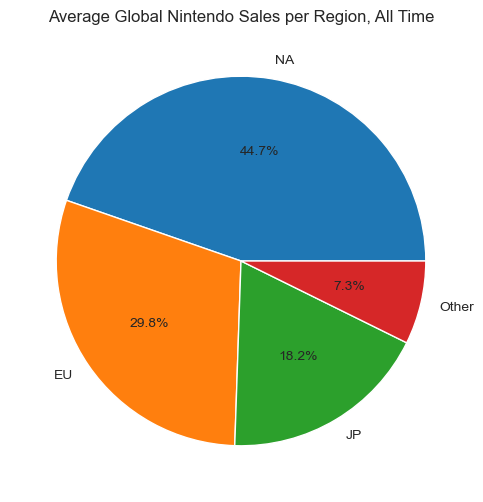

In [73]:
# Creating temp df with averages from above table
temp_df = {
    "labels": ["NA", "EU", "JP", "Other"],
    "values": [df_nin_subset["NA_Sales"].mean(), df_nin_subset["EU_Sales"].mean(), df_nin_subset["JP_Sales"].mean(), df_nin_subset["Other_Sales"].mean()]
    }

sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
# Drawing figure with the values above
plt.pie(temp_df["values"], labels=temp_df["labels"], autopct="%1.1f%%")
plt.title("Average Global Nintendo Sales per Region, All Time")
plt.show()

In [74]:
# Doing the same but for Sony
df_subset = df_sales_new.sort_values("Global_Sales", ascending=False).reset_index()

# Finding the Sony games by using isin and a list of consoles
sony_consoles = ["PS", "PS2", "PS3", "PS4", "PSP", "PSV"]
df_sony_subset = df_subset[df_subset["Platforms"].isin(sony_consoles)].head(30)

df_sony_subset.head(5)

,index,Rank,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platforms
48,3631,29,Gran Turismo 3: A-Spec,2001.0,Racing,Sony Computer Entertainment,6850000.0,5090000.0,1870000.0,1160000.0,14980000.0,PS2
74,3632,48,Gran Turismo 4,2004.0,Racing,Sony Computer Entertainment,3010000.0,10000.0,1100000.0,7530000.0,11660000.0,PS2
84,3628,53,Gran Turismo,1997.0,Racing,Sony Computer Entertainment,4020000.0,3870000.0,2540000.0,520000.0,10950000.0,PS
86,3634,55,Gran Turismo 5,2010.0,Racing,Sony Computer Entertainment,2960000.0,4880000.0,810000.0,2120000.0,10770000.0,PS3
103,3107,67,Final Fantasy VII,1997.0,Role-Playing,Sony Computer Entertainment,3010000.0,2470000.0,3280000.0,960000.0,9720000.0,PS


And a Pie Chart can be created for Sony too, with the above dataframe:

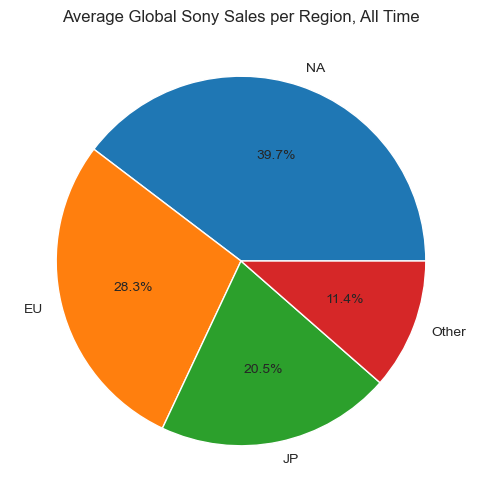

In [75]:
# Creating temp df with averages from above table
temp_df = {
    "labels": ["NA", "EU", "JP", "Other"],
    "values": [df_sony_subset["NA_Sales"].mean(), df_sony_subset["EU_Sales"].mean(), df_sony_subset["JP_Sales"].mean(), df_sony_subset["Other_Sales"].mean()]
    }

sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
# Drawing figure with the values above
plt.pie(temp_df["values"], labels=temp_df["labels"], autopct="%1.1f%%")
plt.title("Average Global Sony Sales per Region, All Time")
plt.show()

Analysing both pie charts, it is interesting how strong the NA market presence has been across all time data, but the PS4 had more performance in the EU than previous Sony and Nintendo records. Furthermore, the PS4's presence in sales in the JP market is only a fraction compared to Nintendo and Sony's historical sales in their home region, showing that the PS4 was much more successful overseas than even in their home country. 

This could be due to a number of reasons, either taken at face value, the PS4 is more popular overseas than at home, or, alternatively, the playerbase overseas has grown dramatically in recent years when compared to historical values, so the non-JP sectors are greatly inflated with the PS4, when compared to historical data, and trends in the western gaming market have taken off while still maintaining popularity in the home market. Next, I want to analyse sales trends over time and create a line series for it.

### Global Sales Trends Over Time

To create a graph of this, I can simply use the full df_sales_extra dataset, and group by years to get a sub-frame of sales per year for every region.

In [76]:
# Creating subset for sales per year, by first creating columns that I wish to keep
aggregated_columns = {"Year":"first", "NA_Sales":"sum", "EU_Sales":"sum", "JP_Sales":"sum", "Other_Sales":"sum", "Global_Sales":"sum"}

# Creating the new dataset based off of the columns
df_sales_years = df_sales_new.groupby(df_sales_new["Year"]).aggregate(aggregated_columns)

#Outputting the last 5 years to check results
df_sales_years.tail(5)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,
2014.0,2014.0,115620000.0,108040000.0,36510000.0,33580000.0,293770000.0
2015.0,2015.0,100230000.0,94730000.0,32810000.0,29100000.0,257100000.0
2016.0,2016.0,22010000.0,25980000.0,13250000.0,7560000.0,68830000.0
2017.0,2017.0,0.0,0.0,50000.0,0.0,50000.0
2020.0,2020.0,270000.0,0.0,0.0,20000.0,290000.0


As established before, this dataset cuts off at around 2017, so the results afterwards are not entirely accurate. Regardless, I will keep them in my graph.

<Axes: xlabel='Year', ylabel='Global_Sales'>

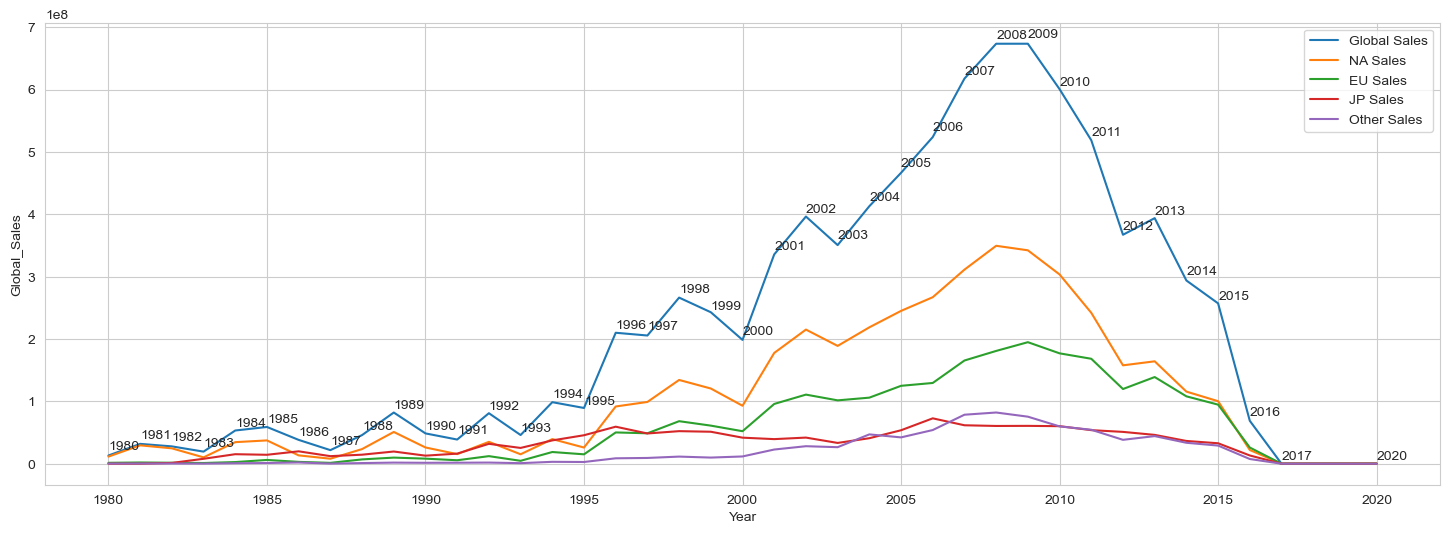

In [77]:
import random

plt.figure(figsize=(18,6))

# Global Sales Plot
sns.lineplot(x = "Year",
             y = "Global_Sales",
             label = "Global Sales",
             data=df_sales_years)

# Using a for loop to draw text labels for years for every point on the graph
for x, y in zip(df_sales_years["Year"], df_sales_years["Global_Sales"]):
    plt.text(x = x,
            y = y + random.randint(5000000,10000000), # Using randomint here so that conescutive labels are not too close to make it unreadable,
             # Especially in the earlier years on the graph
            s = int(x))

# NA Sales Plot
sns.lineplot(x = "Year",
             y = "NA_Sales",
             label = "NA Sales",
             data=df_sales_years)

# EU Sales Plot
sns.lineplot(x = "Year",
             y = "EU_Sales",
             label = "EU Sales",
             data=df_sales_years)

# JP Sales Plot
sns.lineplot(x = "Year",
             y = "JP_Sales",
             label = "JP Sales",
             data=df_sales_years)

# Other Sales Plot
sns.lineplot(x = "Year",
             y = "Other_Sales",
             label = "Other Sales",
             data=df_sales_years)

From this graph, it is clear to see that global game sales reached a peak in the late 00s, reaching nearly 100 million copies sold in those years, and it could be theorised that the recession around 2008 could have impacted video game sales for the following few years. However, considering how profitable video games as an entertainment industry are right now, I believe that this dataset simply lacks data for correct sales numbers for the mid-late 10s, and considering how the PS4 sales numbers are greatest in those later years, I am lead to believe that it is just missing data rather than anything else. To prove this as so, I will do a similar time series graph for the popular PS4 dataset, to check how close the PS4 sales data per year is with a smaller dataset.

### Time Series for PS4 Games

In [78]:
# Creating the subset from the PS4 dataset
aggregated_columns = {"Release_Date":"first", "Copies sold":"sum"}

# Creating the new dataset based off of the columns
df_ps4_years = df_ps4.groupby(df_ps4["Release_Date"]).aggregate(aggregated_columns)

#Outputting the last 5 years to check results
df_ps4_years.tail(5)

,Release_Date,Copies sold
Release_Date,,
2016,2016,22920000.0
2017,2017,25400000.0
2018,2018,49670000.0
2019,2019,3300000.0
2020,2020,29960000.0


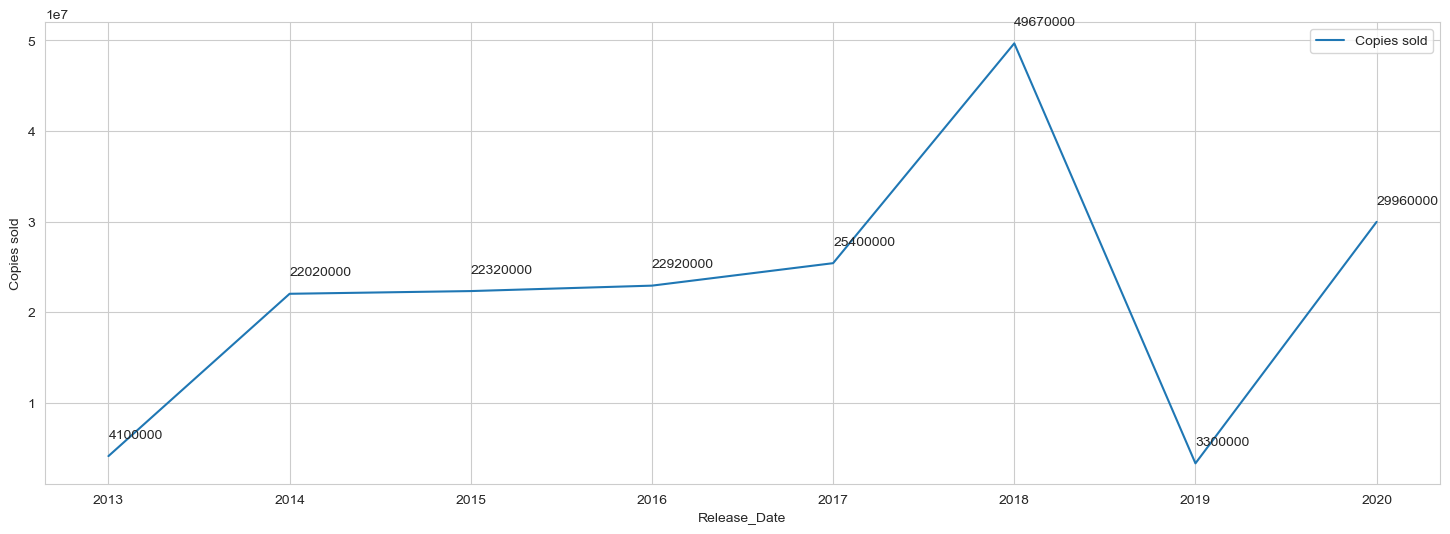

In [79]:
# Creating the time series graph
plt.figure(figsize=(18,6))

# Global Sales Plot
sns.lineplot(x = "Release_Date",
             y = "Copies sold",
             label = "Copies sold",
             data=df_ps4_years)

# Using a for loop to draw sales numbers for years for every point on the graph
for x, y in zip(df_ps4_years["Release_Date"], df_ps4_years["Copies sold"]):
    plt.text(x = x,
             y = y + 2000000,
             s = int(y))


This time series shows that of this small dataset that only contains the 30 best selling games, the totals of these games still combined to be on average higher than 10 million a year, with 2018 being a very successful year for the PS4. Considering that 2016 had a total of nearly 23 million game sales, from a dataset of 33, leads me to believe that the other dataset, which showed 2016 as having less than 100 million game sales, is simply incomplete for those later years.

### Regression Graph for User Review Scores Over Time

Out of curiosity, I want to see how the trend in ratings for games has changed over the years. So, I will once again calculate a subset that contains the year, and the average rating for all games within a single year, and plot that over time. This time however, I will use a scatter graph with a regression line, to allow for a line of best fit to be generated, to see the trend over time.

In [80]:
# Creating the subset from the Reviews dataset
aggregated_columns = {"Release Date":"first", "Rating":"mean"}

# Creating the new dataset based off of the columns
df_reviews_years = df_reviews.groupby(df_reviews["Release Date"]).aggregate(aggregated_columns)

#Outputting the last 5 years to check results
df_reviews_years.tail(5)

,Release Date,Rating
Release Date,,
2019,2019,3.843678
2020,2020,3.768919
2021,2021,3.794845
2022,2022,3.739695
2023,2023,3.694444


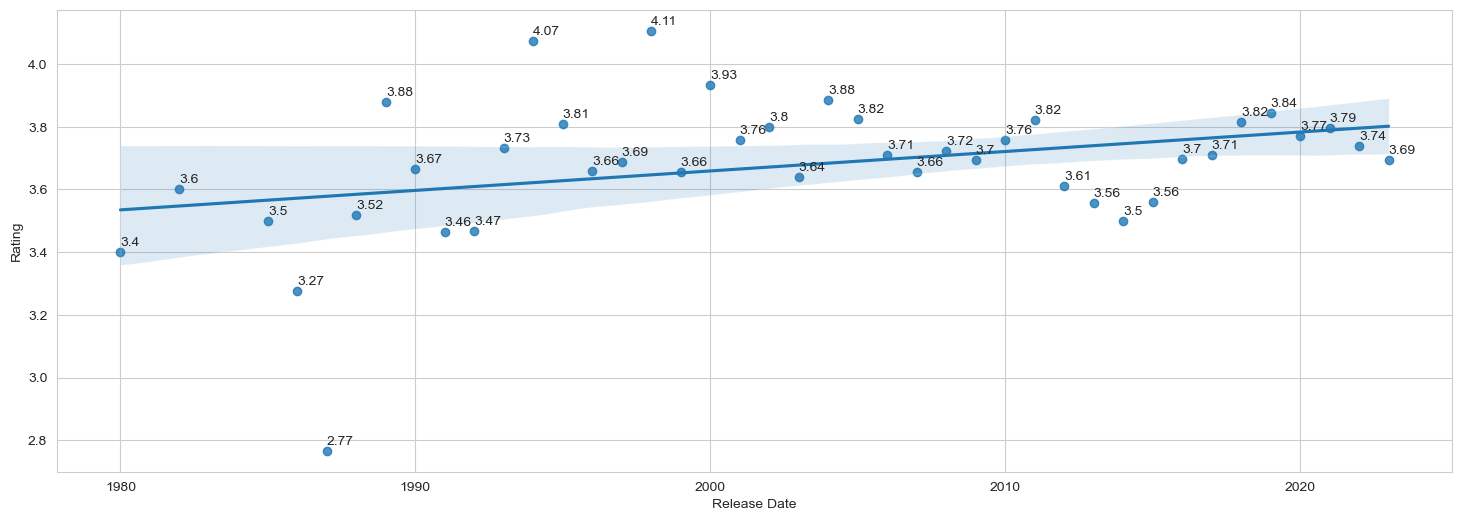

In [81]:
# Specifying the figure dimensions
plt.figure(figsize=(18,6))

# Reviews Scatter Plot
sns.regplot(x = "Release Date",
             y = "Rating",
             label = "Rating",
             data=df_reviews_years)

# Using a for loop to draw average review score for years for every point on the graph
for x, y in zip(df_reviews_years["Release Date"], df_reviews_years["Rating"]):
    plt.text(x = x,
             y = y + 0.02,
             s = round(y, 2))
    

This shows that there is a very weakly positive trend over time, although as the trend is so weak, there may not be a realistic difference year over year. The earlier years being sparse in density is very interesting, however this is most likely because Backloggd, the data source for these user scores, is a fairly recent website, so the games that recieve the most reviews are most likely the latest releases, meanwhile people reviewing older games are much more likely to be an edge case in review scores, either positive or negative, to drive them to review a game that old. 

### To Summarize...

In summary, this data analysis has revealed the global regional trends in game sales for Sony and Nintendo, and has also revealed the sheer amount of sales numbers that the games industry achieved year over year. Furthermore, I have investigated the general trend for user perception of games over time, and shown that there is a slight positive trend to user scores. This gives me useful context for the historical state of the video game market, which I will discuss in my conclusion.

## Saving My Results

I hope to save my clean dataframes that I produced for future usage and data archiving reasons. So, to do this, I will output those results as a saved .csv file that can be accessed for the future. Also, considering that I have 3 seperate tables of results, I can also consider saving them into a database for future retrieval, which would be extremely easy when done this way, and opens the ability for data querying and form making by using SQL programs. So, I will save it into a MySQL database. 

To start with, I will create the CSV files.

In [82]:
# Exporting all of the dataframes as CSV files
df_reviews.to_csv("Data-Cleaned/game_reviews.csv")
df_ps4.to_csv("Data-Cleaned/ps4_sales.csv")
df_sales_extra.to_csv("Data-Cleaned/game_sales.csv")

With this done, I can now set up a MySQL Database connection for use to save the dataframes to a database. I will have to run some installers for the software first to allow connection to a database. The following installers will install mysql-connector, and install python-dotenv. I had some issues with my pre-installed version of python-dotenv from anaconda being incompatible with this python version, so if that is the case, runnining the commented out uninstall command and then the install command will fix that.

In [83]:
!pip install mysql-connector-python

In [84]:
#!pip uninstall python-dotenv --yes

In [85]:
!pip install python-dotenv

In [86]:
# Setting up imports
import sqlalchemy
from sqlalchemy import create_engine
from tqdm.auto import tqdm
import os
from dotenv import load_dotenv

# Loading environment variables so as to not comprimise my MySQL credentials
load_dotenv()

# Creating the connection engine to the database
engine=create_engine(f"mysql+mysqlconnector://{os.getenv('MySQLusername')}:{os.getenv('MySQLpassword')}@{os.getenv('MySQLhost')}/video_games")

# Assigning the dataframes names to make adding to the database much easier
df_reviews.name = "game_reviews"
df_ps4.name = "ps4_game_sales"
df_sales_extra.name = "video_game_sales"

# Creating a list of the created dataframes
dataframes = [df_reviews, df_ps4, df_sales_extra]

# Loops through the list of dataframes, and adds them to the database one at a time, using the name parameter as assigned earlier for the table names
for i, file_path in tqdm(list(enumerate(dataframes))):
    dataframes[i].to_sql(dataframes[i].name, con=engine, index=False, if_exists="replace")
    

  0%|          | 0/3 [00:00<?, ?it/s]

This data has now been saved in a MySQL Database, for archival purposes, and can be either queried or retrieved whenever required in the future, allowing for faster access to the data without having to run the cleaning proccesses again.

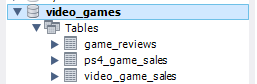

With my data safely loaded, exported, and archived, I believe I can move on to finalising this report.

## Conclusion

To evaluate, continuing on from what I mentioned in the data summary, this analysis has revealed the sheer amount of sales across the world, and broken down how games perform per region. On the whole, user perception seems to be going up as a trend, and while the sales dataset was incomplete, it was still clear from the PS4 dataset that individual game sales, even for exclusive console games, have bene increasing at a tremendous pace. Multiplatform still reigns supreme in terms of maximum total game sales possible, which makes sense, as more users can have access to games if they are multiplatform. However, it is still clear that there is an incentive for exclusive games to still exist in the market, as with a console platform that has had time and money invested into it over multiple years, the exclusive games on those platforms can rival the performance of multiplatform games. But, I can deduce from this that any game platform or console that has a smaller install base, or has been poorly managed, will suffer with much less sales performance when compared to their competitors.

This leads me into why I performed this research at all; I wanted to compare Nintendo and Sony's historical performance against Microsoft and the Xbox platform. This week, the CEO of Xbox, Phil Spencer, announced the roadmap that Xbox will be taking for the future, and their main focus is to begin bringing their exclusive games to new platforms globally. When considering Xbox's poor performance as competitors up against Sony and Nintendo, who have had a very strong recent generation of games, it is clear that Xbox has faltered and fallen behind in their install base and exclusive game sales. This, coupled with the fact that Xbox has to technically compete with itself, as Microsoft, of course, own Windows, and so can bring Xbox owned games to Windows PCs, means that the Xbox platform as a home for exclusive games does not offer as much interest over, say, a Nintendo console, with Nintendo games and IPs. 

I believe that, considering these factors, Xbox's plan makes sense. If they cannot compete with Sony and Nintendo, and are facing inside competition with Windows PCs, who already have a much higher install base than any Xbox console, then it makes sense that rather than focusing on the cookie cutter console approach, they should aim to go multiplatform with their IPs, to reach a much larger audience. And then, as Phil mentioned, there is still new and unique Xbox hardware coming, however, this brings a new creative opportunity for them if they are not focusing on exclusive games as much anymore; they can take notes from Nintendo, and create a unique hardware experience, similar to the Switch, which spawned a whole new console sub-category, so Microsoft could bring something entirely new to the plate, instead of following the traditional game console box format which Playstation and Xbox have held steadfast to since their inception. 

To further investigate and evaluate their decision, I could research for more modern, and complete datasets, that could help piece together the story for exclusives in the later years of the last console cycle, and in the early years of the new generation, as I have not factored the PS5 and the Xbox Series X into this investigation at all, as initial data searching prooved fruitless. But for the future, analysing more modern data, comparing exclusive game sales year by year for each console platform, and potentially even looking into development costs for Triple-A games would be worth considering, to see if it is worth for a console company to invest in their own studio divisions, or to instead invest in multiplatform game studios, who can recieve funding from elsewhere too, and create a better product for it. However, with the data I have analysed in this report, I am still satisfied with my conclusions.

Therefore, to conclude, I believe that Xbox has made the right call for going multiplatform, if they cannot compete with Sony and Ninteno anymore on the exclusives front, then it makes sense to go down this route, like Sega once did before them, and Atari too. There is still plenty of growth and opportunity present in the video game market, and with emerging technologies, who knows what innovations could come along soon to aid in creating new, creative, and exciting, long-lasting experiences, instead of short-lived blockchain and AI experiments. The future possibilities for Xbox are potentially bright, if they can navigate this change correctly, and use their studio acquisitions they put so much money into wisely.